# **Daegu Apartment**

[Sumber data Daegu Apartment](https://drive.google.com/drive/folders/13bd2xHVkKwbrZrItJUm0LcH7NGaonm-0) 

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

**Context**

Daegu adalah kota terbesar keempat di Korea Selatan dan berfungsi sebagai pusat ekonomi serta budaya di wilayahnya. Dengan populasi yang terus tumbuh dan urbanisasi yang pesat, kebutuhan akan hunian, terutama apartemen, semakin meningkat di Daegu. Apartemen menjadi pilihan utama bagi banyak penduduk kota ini karena keterbatasan lahan serta padatnya aktivitas bisnis di perkotaan.

Harga apartemen di Daegu dipengaruhi oleh berbagai faktor, baik **internal** maupun **eksternal**. Faktor internal meliputi **tahun pembangunan, fasilitas parkir,** dan **tipe apartemen**. Sementara itu, faktor eksternal mencakup **jarak ke fasilitas umum, universitas**, dan **stasiun terdekat**.

Penawaran apartemen di Daegu sering dilakukan oleh individu maupun perusahaan, dengan penentuan harga jual yang sepenuhnya ada di tangan pemilik. Tantangan utama bagi pemilik apartemen adalah menentukan harga yang tepat. Jika harga terlalu tinggi dibandingkan dengan properti lain, unit apartemen akan sulit terjual. Namun, jika harga terlalu rendah, pemilik berisiko kehilangan potensi keuntungan.

**Problem Statement**

Di pasar apartemen Daegu yang semakin kompetitif, **pemilik properti** dan **investor** menghadapi tantangan dalam menentukan harga jual yang tepat. Jika harga terlalu tinggi, pembeli akan menjauh, tetapi jika terlalu rendah, pemilik bisa kehilangan keuntungan.

Banyak faktor mempengaruhi harga apartemen, dan pemilik sering kesulitan memahami bagaimana kombinasi faktor-faktor tersebut berdampak pada harga. Oleh karena itu, penting untuk memahami faktor-faktor utama yang memengaruhi harga apartemen di Daegu agar dapat membangun **model prediksi harga yang akurat**.

Pertanyaan utama yang ingin dijawab:
- Faktor apa saja yang paling memengaruhi harga apartemen di Daegu?
- Bagaimana membangun model prediksi harga yang akurat berdasarkan ukuran apartemen, akses transportasi, fasilitas, dan tipe hallway?

Hasil dari analisis ini akan membantu pemilik properti dan investor menentukan harga jual yang optimal dan memaksimalkan keuntungan di pasar apartemen Daegu.

**Goals**

Bagi pemilik **properti** dan **investor** di Daegu, memiliki `tool` yang dapat membantu menentukan harga jual apartemen yang tepat sangat penting. Harga jual yang optimal akan membantu mereka menarik pembeli dengan cepat, sekaligus memaksimalkan keuntungan. Adanya berbagai perbedaan fitur dalam setiap apartemen, seperti ukuran, lokasi, aksesibilitas ke transportasi umum, dan fasilitas yang tersedia, akan meningkatkan akurasi prediksi harga jual. Ini dapat memastikan pemilik properti menetapkan harga yang kompetitif di pasar.

Dengan prediksi harga yang akurat, pemilik properti dan investor akan lebih mudah menetapkan harga yang sesuai dengan pasar, sehingga dapat meningkatkan volume penjualan apartemen. Tool ini tidak hanya akan membantu individu penjual, tetapi juga memberikan wawasan yang lebih luas bagi pengembang properti untuk merencanakan strategi penjualan yang lebih baik. Dengan demikian, ini akan menciptakan ekosistem properti yang lebih efisien dan menguntungkan di Daegu.

**Analytic Approach**

Yang perlu dilakukan adalah menganalisis data untuk mengidentifikasi faktor-faktor yang memengaruhi harga sewa apartemen di Daegu. Dengan memahami pola dan hubungan antar fitur, kami akan mengembangkan model regresi yang dapat membantu pemilik apartemen dalam menentukan harga sewa yang optimal. Model ini akan menjadi alat yang berguna untuk membuat keputusan harga yang lebih tepat dan kompetitif.

**Metric Evaluation**

Metrik yang akan digunakan untuk evaluasi model adalah RMSE, MAE, dan MAPE. RMSE merupakan nilai rata-rata akar kuadrat dari kesalahan, sedangkan MAE adalah rata-rata nilai absolut dari kesalahan. MAPE mengukur rata-rata persentase kesalahan yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi harga sewa apartemen sesuai dengan fitur yang digunakan.

Selain itu, kami juga akan mempertimbangkan nilai R-squared atau adjusted R-squared jika model akhir yang dipilih adalah model linear. Nilai R-squared akan membantu kita memahami sejauh mana model dapat menjelaskan variasi dalam data. Nilai yang mendekati 1 menunjukkan bahwa model sangat baik dalam merepresentasikan data observasi. Namun, penting untuk dicatat bahwa metrik ini tidak berlaku untuk model non-linear.

****

## **2. Data Understanding**

- Dataset merupakan data listing Apartment di Kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti dan harga.

In [1]:
#Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Attributes Information**

| No.| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- | --- |
| 1 | HallwayType  | Categorical | Tipe Apartemen |
| 2 | TimeToSubway | Categorical | Jarak Stasiun Terdekat (min)  |
| 3 | SubwayStation | Categorical | Nama Stasiun Terdekat |
| 4 | N_FacilitiesNearBy(ETC) | Numerical | Jumlah Fasilitas Terdekat |
| 5 | N_FacilitiesNearBy(Public Office) | Numerical | Jumlah Kantor Pemerintah Terdekat |
| 6 | N_SchoolNearBy(University) | Numerical | Jumlah Universitas Terdekat |
| 7 | N_Parkinglot(Basement) | Numerical | Jumlah (Basemen) Lahan Parkir |
| 8 | YearBuilt | Numerical | Tahun Pembangunan |
| 9 | N_FacilitiesInApt | Numerical | Jumlah Fasilitas Apartment |
| 10 | Size(sqf) | Numerical | Luas Apartment |
| 11 |SalePrice | Numerical | Harga Jual Apartment (Won) |

<br>

In [3]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


### **Exploratory Data Analysis**

#### **Data Distribution**

In [4]:
# membuat variabel untuk kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating count plots for categorical variables
categorical_columns = ['HallwayType', 'TimeToSubway', 'SubwayStation']

**Numerical Column**

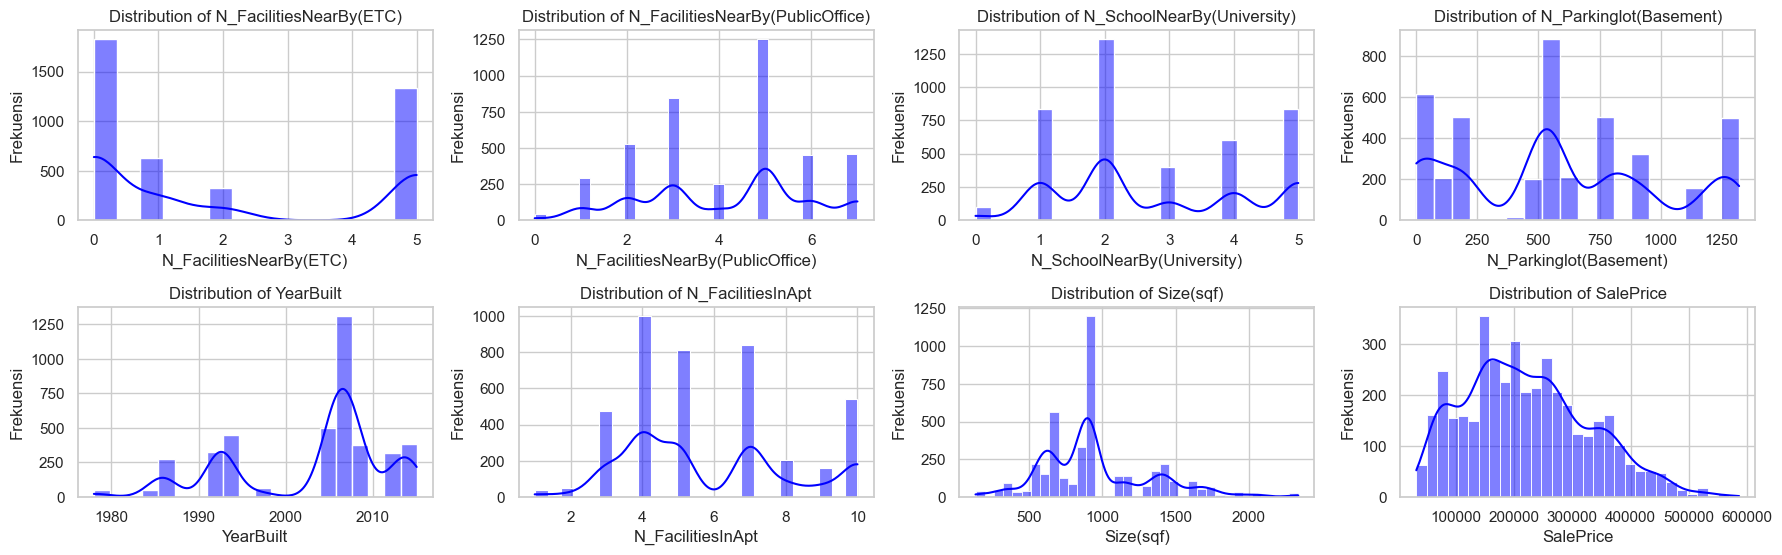

In [5]:
# menentukan ukuran figure untuk subplot
plt.figure(figsize=(18,8))

# looping melalui setiap kolom untuk menampilkan distribusi dan boxplot
for i, column in enumerate(numeric_columns, 1):
    # Subplot untuk distribusi
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    
# Menampilkan visualisasi
plt.tight_layout()
plt.show()

**Insight:**

1. Distribusi Data:
    - Setiap kolom numerik dalam dataset ditampilkan menggunakan histogram. Hal ini memberikan gambaran bagaimana data tersebar.
    - Kita bisa melihat apakah data terdistribusi secara normal, right skew atau left skew.

2. Identifikasi Kemiringan Data:
    - Jika distribusi suatu kolom right skew, seperti SalePrice (Harga Jual) atau Size(sqf) (Ukuran Apartemen), itu menunjukkan bahwa sebagian besar nilai berada di kisaran rendah, dengan beberapa nilai yang sangat tinggi (outlier).
    - Jika distribusi left skew, ini menunjukkan sebaliknya yaitu sebagian besar nilai berada di kisaran tinggi.

3. Insight Harga Jual:
    - Kolom SalePrice mungkin menunjukkan distribusi yang right skew, yang berarti sebagian besar apartemen memiliki harga yang lebih rendah, tetapi ada beberapa apartemen yang sangat mahal. Ini bisa disebabkan oleh faktor-faktor tertentu seperti lokasi yang strategis atau ukuran apartemen yang sangat besar.

4. Ukuran Apartemen:
    - Kolom Size(sqf) juga bisa memiliki distribusi right skew, menunjukkan bahwa apartemen dengan ukuran besar lebih sedikit daripada apartemen berukuran kecil atau sedang.

5. Potensi Outliers:
    - Jika distribusi data memiliki skew ke kanan atau kiri, ini bisa menunjukkan adanya outlier dalam dataset. Outlier ini mungkin penting untuk dianalisis lebih lanjut karena bisa memengaruhi model prediksi di tahap pemodelan nanti.

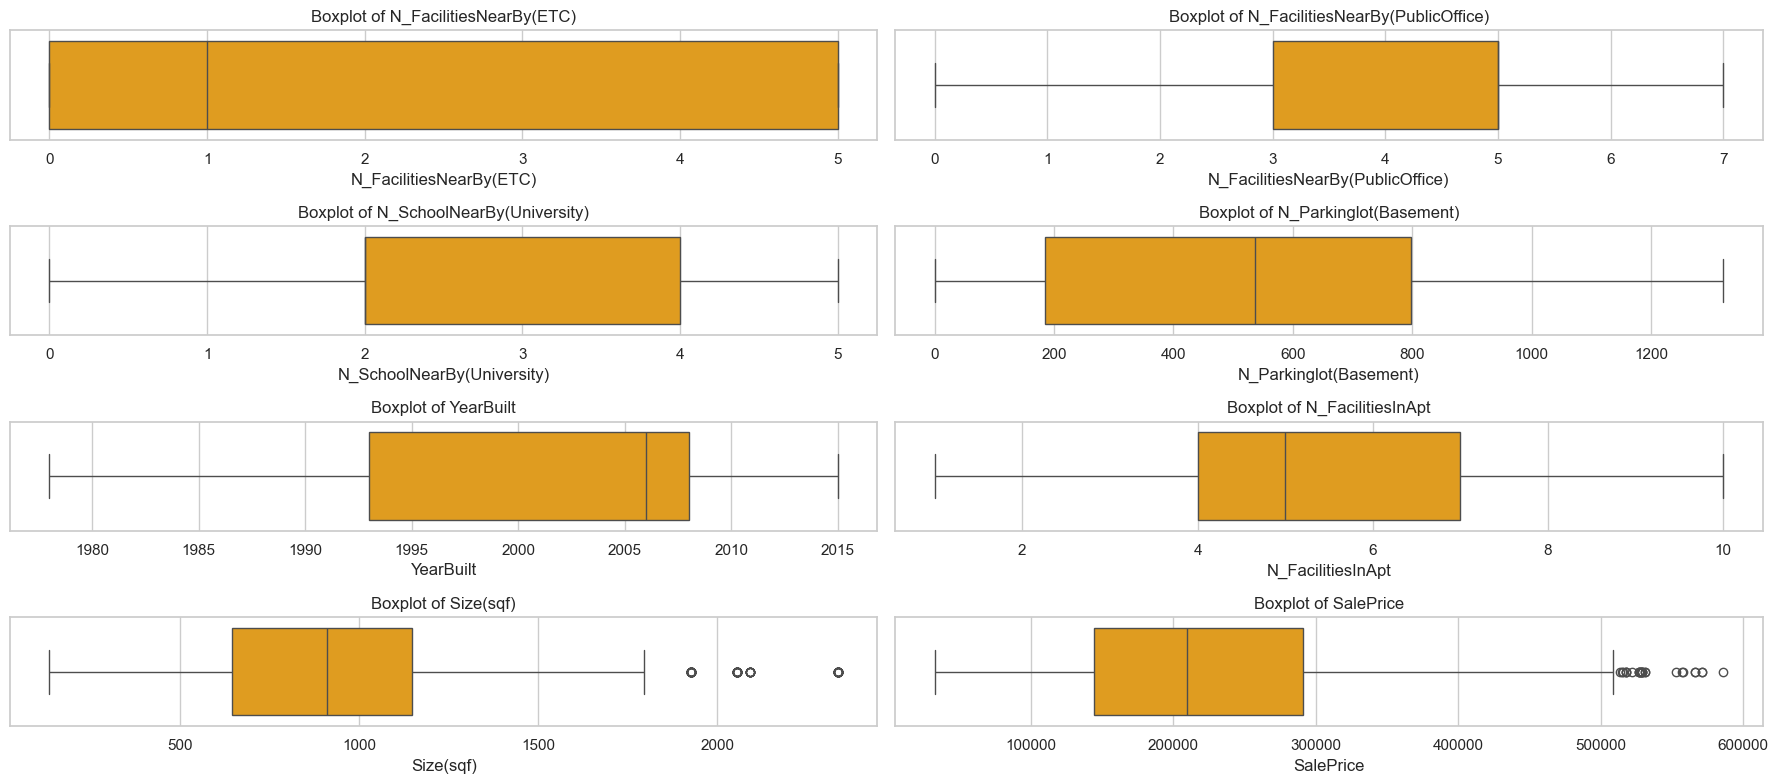

In [6]:
# menentukan ukuran figure untuk subplot
plt.figure(figsize=(18,8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Insight :**

1.	Identifikasi Outliers:
	- Boxplot menampilkan persebaran data dan memberikan gambaran jelas mengenai outliers (nilai yang sangat jauh dari data lain).
	- Kolom seperti SalePrice dan Size(sqf) kemungkinan memiliki outliers yang signifikan, karena harga apartemen atau ukuran seringkali memiliki nilai-nilai ekstrem (seperti apartemen yang sangat mahal atau berukuran sangat besar).
	- Boxplot menunjukkan adanya outlier (nilai ekstrim), terutama pada SalePrice, Size(sqf), dan YearBuilt. Ini berarti ada beberapa apartemen yang harganya jauh lebih tinggi atau lebih rendah dari rata-rata.

2.	Rentang Persebaran Data:
	- Box di dalam boxplot menunjukkan rentang interkuartil (IQR), yaitu rentang dari kuartil pertama (Q1) hingga kuartil ketiga (Q3). Rentang ini memberikan gambaran tentang seberapa tersebar data.

**Categorical Columns**

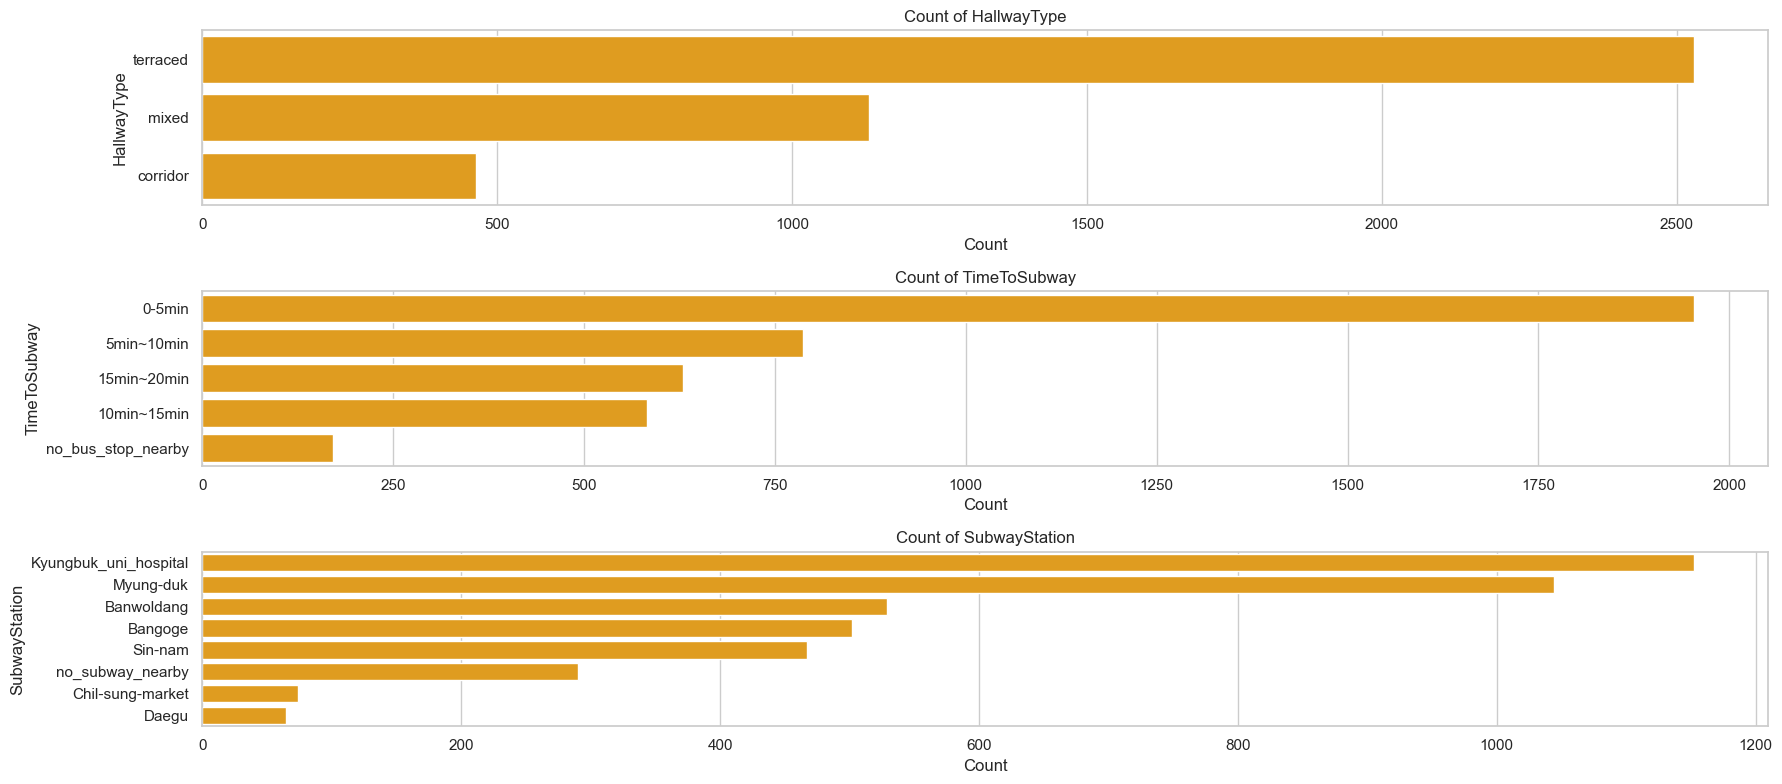

In [7]:
# menentukan ukuran figure untuk subplot
plt.figure(figsize=(18,8))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index, color='orange')
    plt.title(f'Count of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**Insight**

1.	Distribusi Tipe Apartemen (HallwayType):
	- Visualisasi ini menunjukkan jumlah apartemen berdasarkan HallwayType.
	- Jika salah satu tipe hallway memiliki jumlah yang jauh lebih besar dibandingkan tipe lainnya, berarti jenis apartemen tersebut lebih umum dan lebih banyak tersedia di pasar.
	- Sebagian besar apartemen berada dekat dengan beberapa stasiun subway, dan tipe apartemen tertentu (seperti mixed-type) lebih umum ditemukan. Ini mengindikasikan bahwa tipe apartemen dan jarak ke transportasi umum memengaruhi permintaan.
	- Ini juga dapat memberikan gambaran tentang preferensi konsumen di Daegu terhadap tipe apartemen tertentu.

2.	Jarak ke Stasiun Terdekat (TimeToSubway):
	- Distribusi dari TimeToSubway menunjukkan jarak rata-rata apartemen ke stasiun subway terdekat.
	- Sebagian besar apartemen memiliki waktu tempuh yang singkat ke stasiun subway yaitu, 5-10 menit. Ini bisa menandakan lokasi strategis dan aksesibilitas tinggi terhadap transportasi umum.
	- Sebaliknya, jika lebih banyak apartemen yang jauh dari stasiun, berarti banyak properti yang berada di area suburban atau kurang terhubung.

3.	Distribusi Stasiun Subway Terdekat (SubwayStation):
	- Countplot ini memberikan gambaran tentang jumlah apartemen di dekat setiap stasiun subway.
	- Stasiun yang memiliki jumlah apartemen lebih banyak merupakan area yang lebih berkembang atau lebih menarik bagi pengembang properti.
	- Jika ada stasiun yang memiliki sedikit apartemen di sekitarnya, area tersebut kurang berkembang atau belum banyak dilakukan pembangunan di sekitar stasiun tersebut.

4.	Preferensi dan Ketersediaan Lokasi:
	- Jika mayoritas apartemen terletak di dekat stasiun tertentu atau memiliki jarak yang singkat ke subway, ini dapat menunjukkan area-area favorit atau lebih strategis di Daegu.
	- Hal ini dapat membantu pemilik properti atau investor untuk mengetahui area yang lebih diminati dan menawarkan harga yang lebih tinggi.

**Type of Apartment related to Price**

In [8]:
# jumlah apartment berdasarkan HallwayType dan SubwayStation terdekat
print(f"Jumlah apartemen berdasarkan Type Apartment:\n{df['HallwayType'].value_counts()}")
print(f"\nJumlah apartemen berdasarkan Station Subway Terdekat:\n{df['SubwayStation'].value_counts()}")

Jumlah apartemen berdasarkan Type Apartment:
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

Jumlah apartemen berdasarkan Station Subway Terdekat:
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64


In [9]:
# grouping SubwayStation terdekat berdasarkan Tipe Apartment
print(f"Jumlah tiap Tipe Apartment berdasarkan Station Subway Terdekat:  \n\n{df.groupby(['SubwayStation','HallwayType'])['HallwayType'].count()}")

Jumlah tiap Tipe Apartment berdasarkan Station Subway Terdekat:  

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64


**Insight :**

1.	Preferensi Tipe Apartemen:
	- Dengan melihat jumlah apartemen berdasarkan HallwayType, kita dapat mengetahui tipe apartemen mana yang paling populer atau paling banyak tersedia di Daegu. Jika ada satu tipe hallway yang lebih dominan dibandingkan yang lain, ini menunjukkan bahwa tipe tersebut lebih diminati atau lebih umum dibangun oleh pengembang properti.

2.	Lokasi Strategis Apartemen:
	- Jumlah apartemen berdasarkan SubwayStation memberikan informasi tentang area di sekitar stasiun subway yang lebih berkembang atau lebih populer. Jika ada satu atau beberapa stasiun yang memiliki jumlah apartemen jauh lebih banyak, hal ini bisa mengindikasikan bahwa area tersebut merupakan lokasi strategis dan mungkin lebih mahal karena aksesibilitas yang baik terhadap transportasi umum.

3.	Kaitan antara Tipe Apartemen dan Stasiun Subway Terdekat:
	- Dengan mengelompokkan jumlah apartemen berdasarkan SubwayStation dan HallwayType, kita bisa melihat apakah ada hubungan antara lokasi (stasiun subway) dan tipe apartemen yang dibangun di sekitarnya. Misalnya, stasiun-stasiun tertentu mungkin memiliki jenis apartemen yang lebih dominan dibandingkan stasiun lain. Hal ini bisa menunjukkan bahwa di daerah tertentu, tipe apartemen tertentu lebih populer atau lebih sesuai dengan permintaan pasar di area tersebut.

4.	Strategi Pengembangan Properti:
	- Pemahaman tentang hubungan antara stasiun subway dan tipe apartemen juga bisa membantu pengembang properti dan investor dalam merencanakan pembangunan di masa depan. Jika satu tipe apartemen sangat dominan di area tertentu, ini bisa menjadi acuan untuk mempertimbangkan variasi atau diversifikasi properti untuk memenuhi kebutuhan pasar yang berbeda.

#### **Data Correlation**

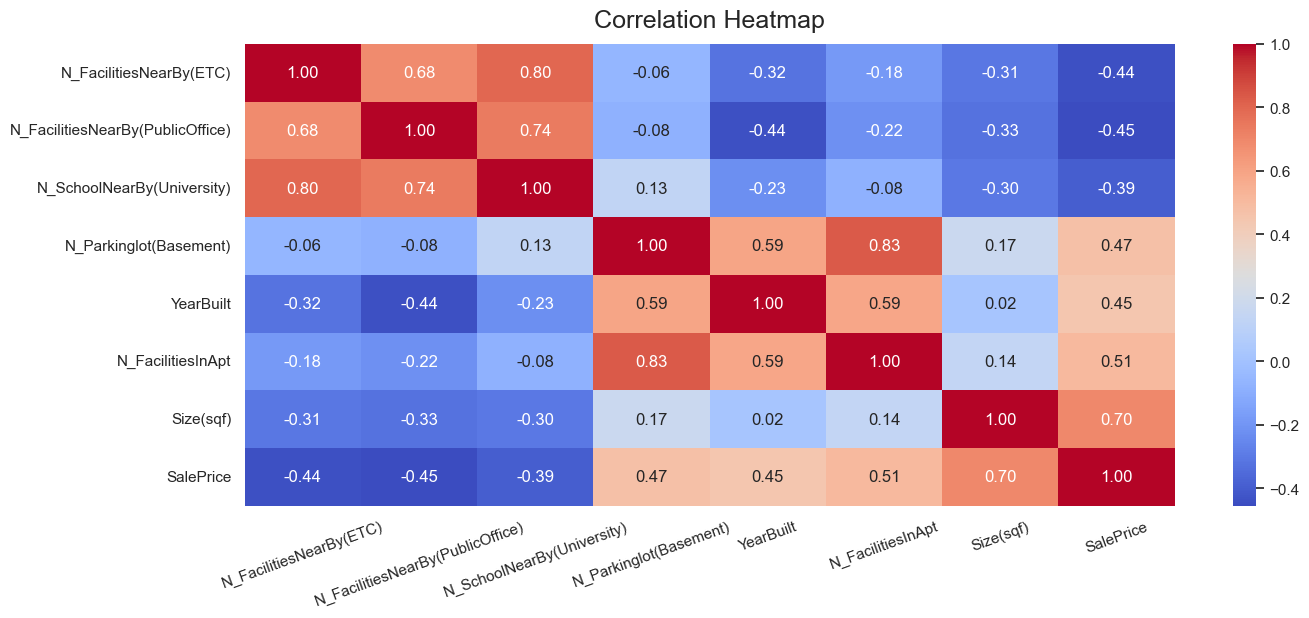

In [10]:
# Calculating the correlation matrix for the numeric variables in the dataset
corr = df.corr(numeric_only=True)

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.xticks(rotation=20)
plt.show()

**Insight :**

1.	Korelasi antara Fitur dan Harga Jual (SalePrice):
	- Heatmap menunjukkan kekuatan hubungan (korelasi) antara variabel numerik dalam dataset. Korelasi yang lebih tinggi (positif atau negatif) antara variabel dan SalePrice (Harga Jual) menunjukkan bahwa variabel tersebut berperan penting dalam menentukan harga apartemen.
	- Size(sqf) memiliki korelasi positif yang kuat dengan SalePrice, artinya semakin besar apartemen, semakin tinggi harganya. Faktor lain seperti YearBuilt dan jarak ke universitas atau fasilitas pemerintah memiliki korelasi yang lebih lemah, yang berarti ukuran apartemen adalah faktor penentu utama harga, sementara faktor lain berpengaruh lebih kecil.

2.	Fitur yang Berkorelasi Positif:
	- Variabel-variabel yang memiliki nilai korelasi positif mendekati +1 dengan SalePrice menunjukkan bahwa semakin tinggi nilai variabel tersebut, semakin tinggi pula harga apartemen. Sebagai contoh, jika variabel N_FacilitiesInApt (jumlah fasilitas di apartemen) memiliki korelasi positif yang signifikan, ini menandakan bahwa apartemen dengan lebih banyak fasilitas cenderung memiliki harga lebih tinggi.

3.	Fitur yang Berkorelasi Negatif:
	- Jika ada variabel yang memiliki korelasi negatif dengan SalePrice, hal ini menunjukkan bahwa semakin tinggi nilai variabel tersebut, semakin rendah harga jual apartemen. Sebagai contoh, jika variabel YearBuilt (tahun pembangunan) memiliki korelasi negatif, ini menandakan bahwa apartemen yang lebih tua cenderung memiliki harga yang lebih rendah dibandingkan dengan apartemen yang lebih baru.

4.	Fitur dengan Korelasi Rendah:
	- Variabel dengan korelasi mendekati 0 terhadap SalePrice berarti hubungan antara variabel tersebut dan harga apartemen sangat lemah atau hampir tidak ada. Variabel-variabel ini mungkin tidak terlalu penting dalam memprediksi harga apartemen dan bisa dipertimbangkan untuk diabaikan dalam model prediktif.

#### **Bivariate Analysis**

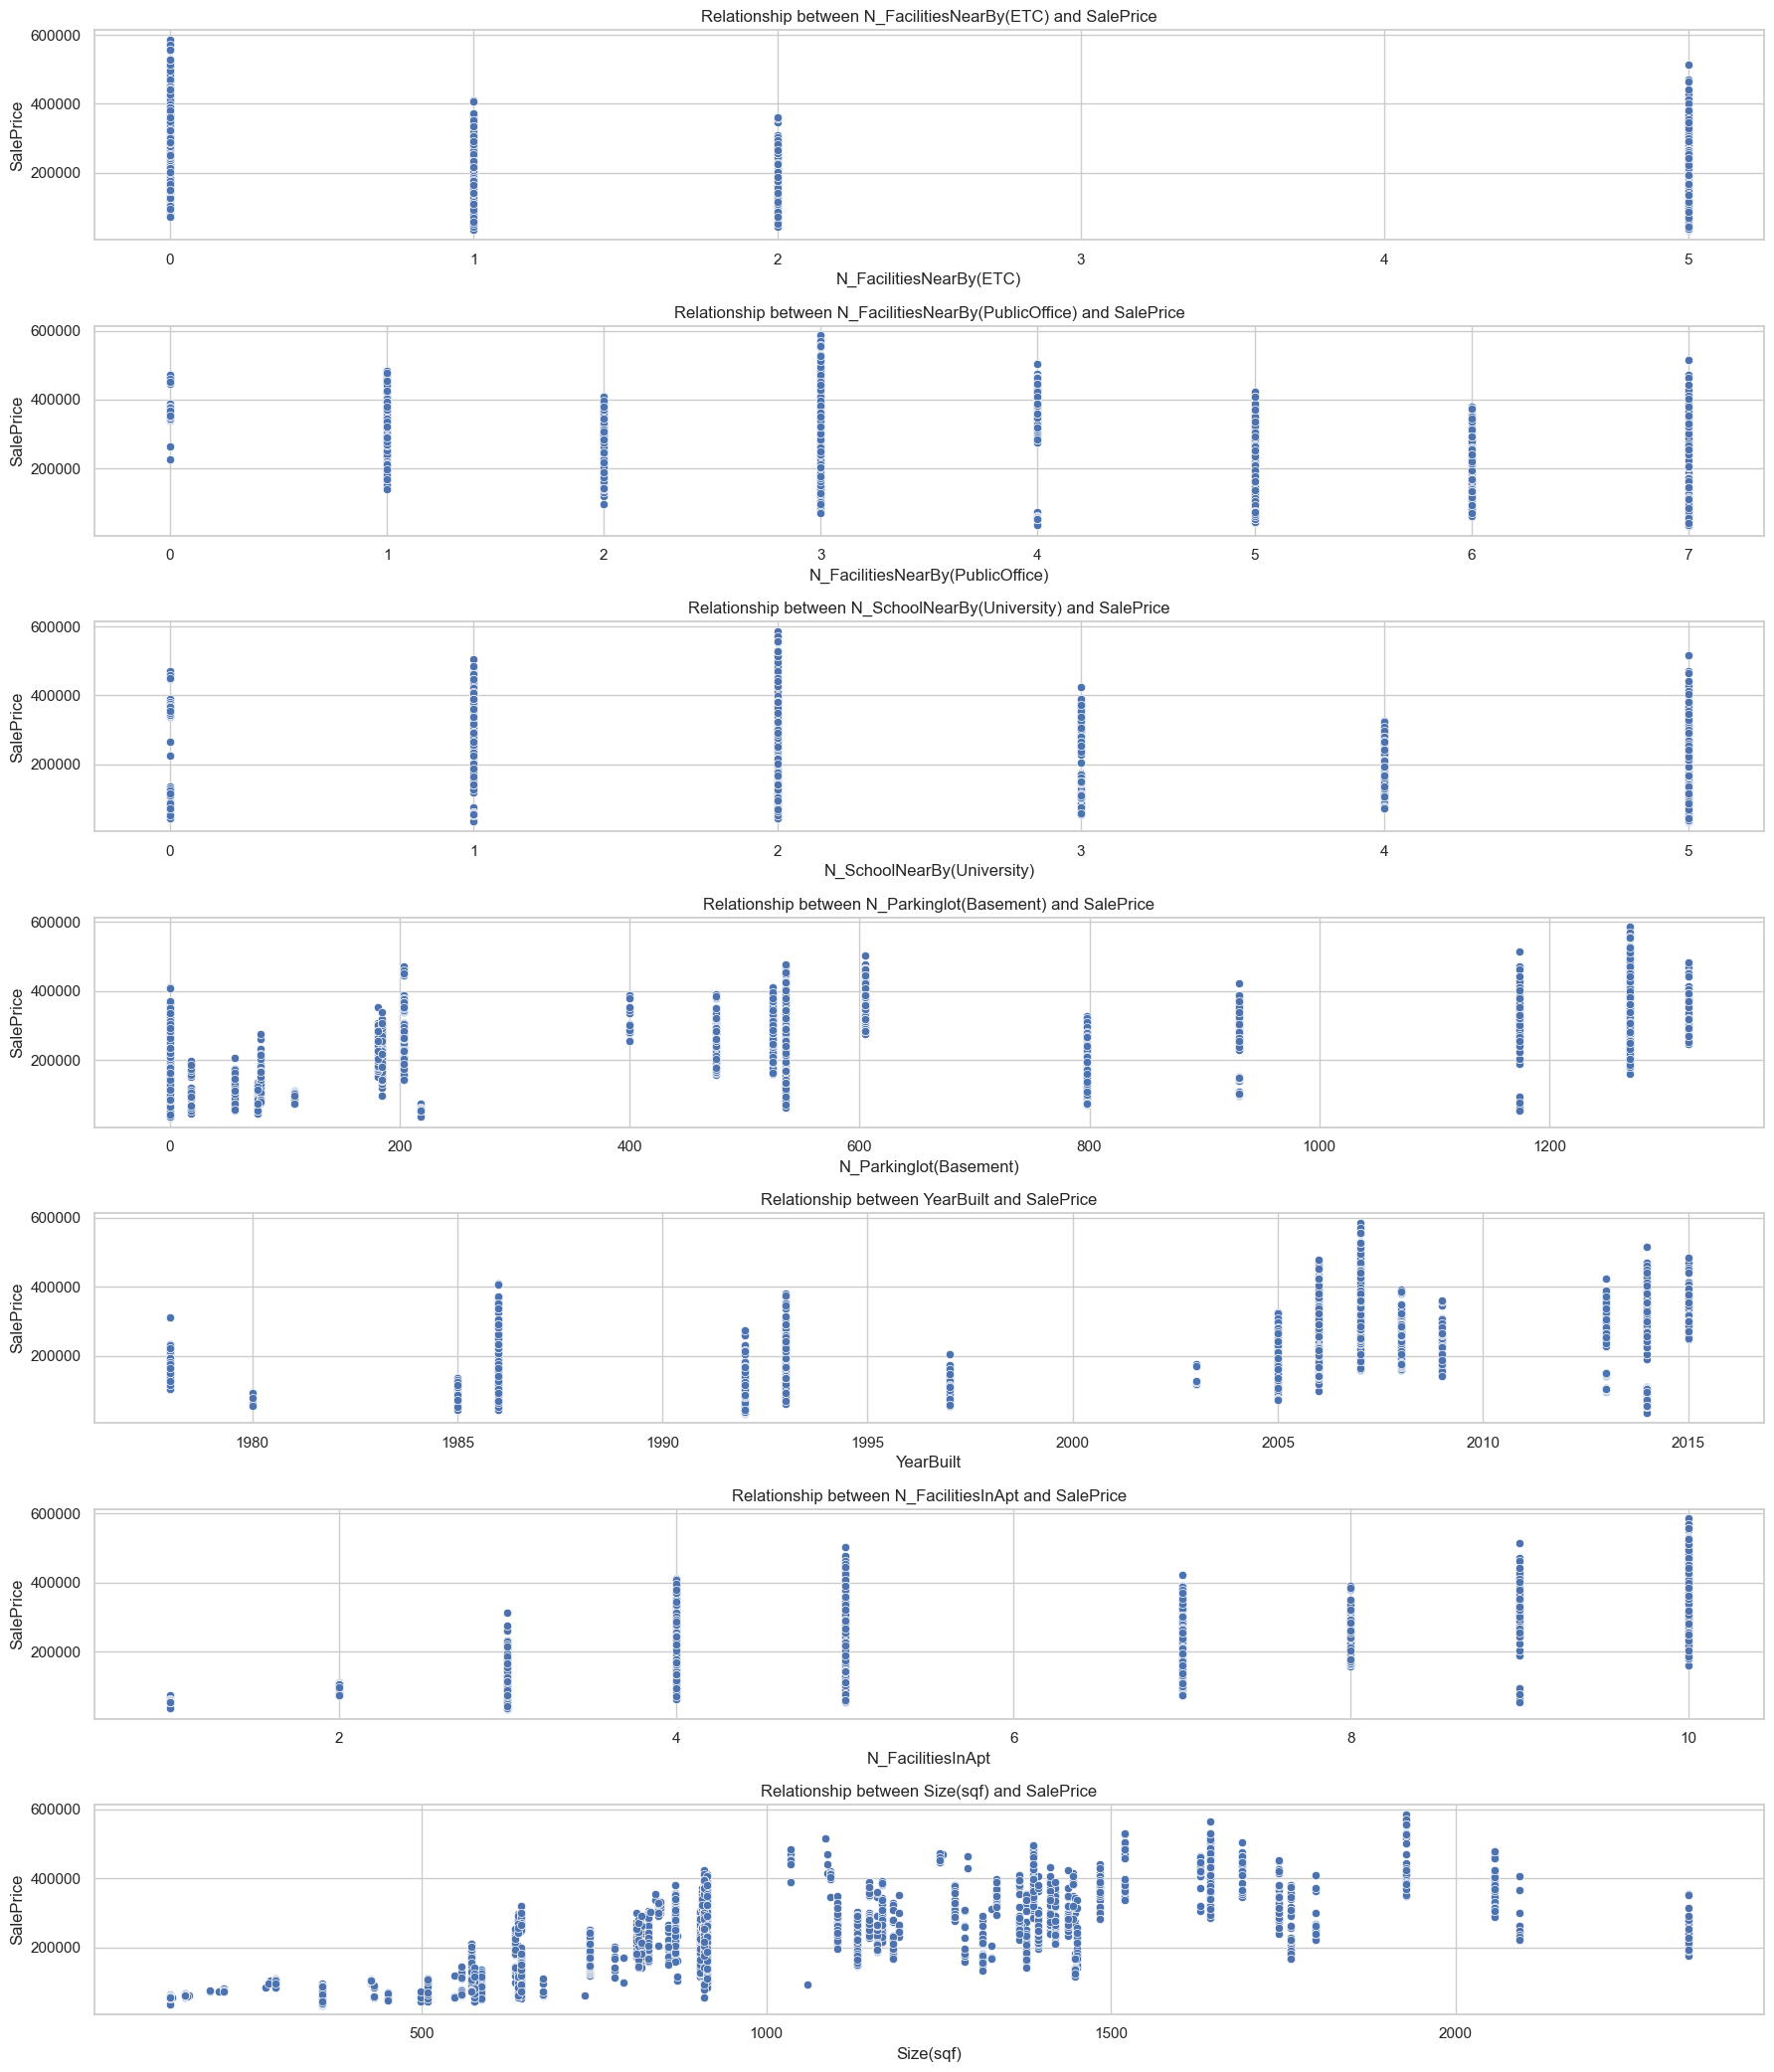

In [11]:
# Separate numeric and categoric columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_columns.remove('SalePrice')  # Remove the target variable from the num columns list
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

# # Plotting the numeric features
fig, axes = plt.subplots(nrows=len(num_columns), ncols=1, figsize=(18, 3*len(num_columns)))
for i, col in enumerate(num_columns):
    sns.scatterplot(data=df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

**Insight :**

1.	Hubungan Linear atau Non-Linear:
    - Plot ini membantu mengidentifikasi apakah ada hubungan linear (positif atau negatif) antara masing-masing fitur numerik dan SalePrice. Jika titik-titik data membentuk pola garis lurus atau cenderung meningkat/menurun seiring dengan peningkatan fitur, berarti ada hubungan linear.
    - Beberapa fitur lain, seperti N_FacilitiesNearBy(ETC) atau N_Parkinglot(Basement), menunjukkan hubungan yang lebih lemah, menunjukkan dampaknya pada harga tidak terlalu besar.
    - Misalnya, jika pada fitur Size(sqf) (luas apartemen) terlihat semakin besar ukuran apartemen, mengonfirmasi bahwa apartemen yang lebih besar cenderung lebih mahal, ini menandakan hubungan linear positif.

2.	Outliers:
    - Jika ada beberapa apartemen dengan harga sangat tinggi atau sangat rendah yang jauh berbeda dari pola umum, ini bisa menjadi indikasi outlier.

3.	Kekuatan Hubungan:
    - Meskipun scatterplot tidak secara langsung menunjukkan nilai korelasi, kita bisa melihat hubungan secara visual. Jika titik-titik data tersebar tanpa pola yang jelas, ini bisa menunjukkan bahwa hubungan antara fitur tersebut dan SalePrice lemah atau bahkan tidak ada.
    - Jika sebaran titik sangat rapat dan membentuk garis yang jelas, ini menunjukkan hubungan yang kuat antara variabel tersebut dan harga apartemen.

4.	Pola Hubungan Lain:
    - Beberapa fitur mungkin menunjukkan hubungan non-linear, seperti bentuk kurva (polinomial) atau eksponensial. Misalnya, harga apartemen bisa naik tajam setelah mencapai ukuran tertentu, atau ada pola kenaikan yang melambat pada titik tertentu.

5.	Insight Tambahan untuk Modeling:
    - Scatterplot ini dapat digunakan untuk menentukan fitur mana yang paling penting untuk prediksi harga apartemen. Fitur dengan pola yang lebih jelas terhadap SalePrice bisa dianggap lebih relevan dan diutamakan dalam proses modeling.
    - Fitur yang tidak menunjukkan pola yang berarti mungkin kurang relevan dan bisa dipertimbangkan untuk diabaikan dalam model prediksi.

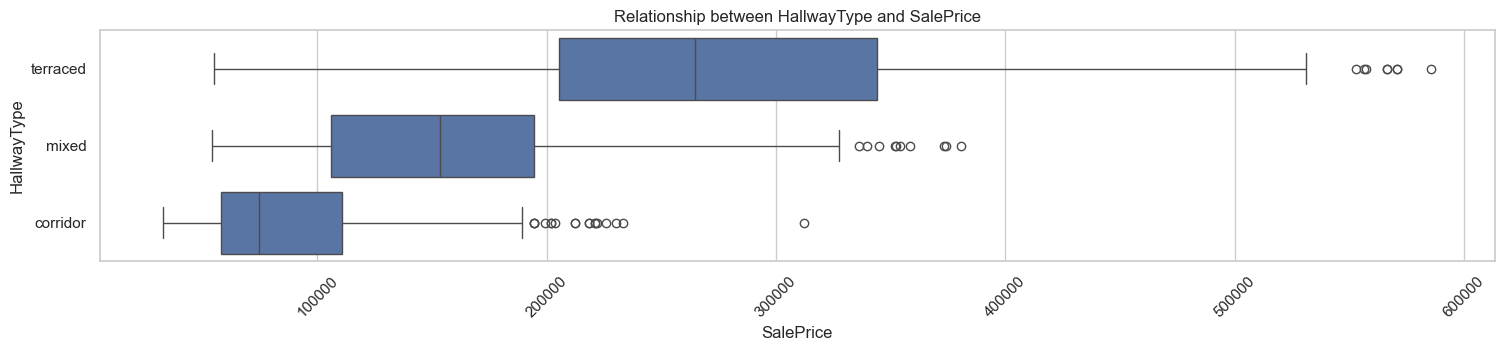

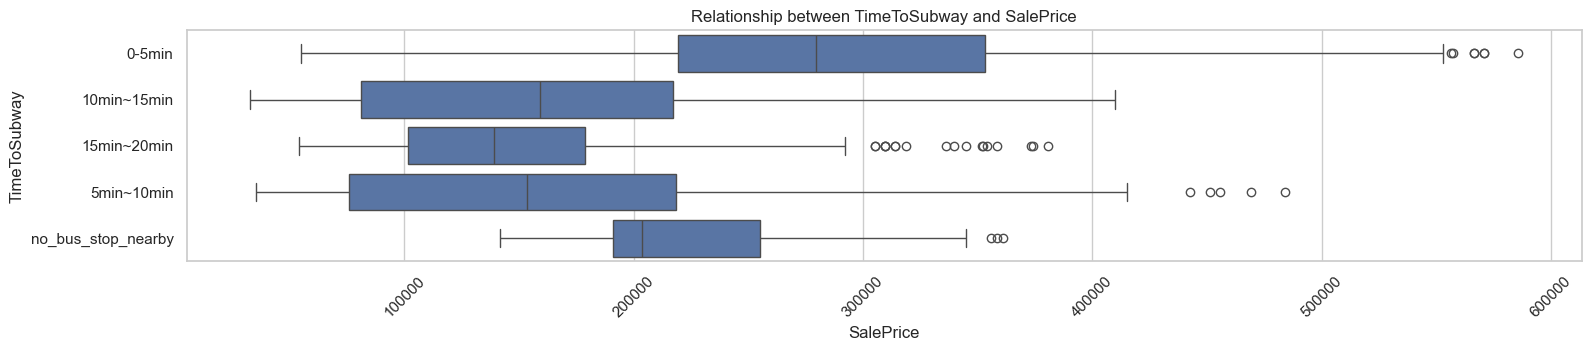

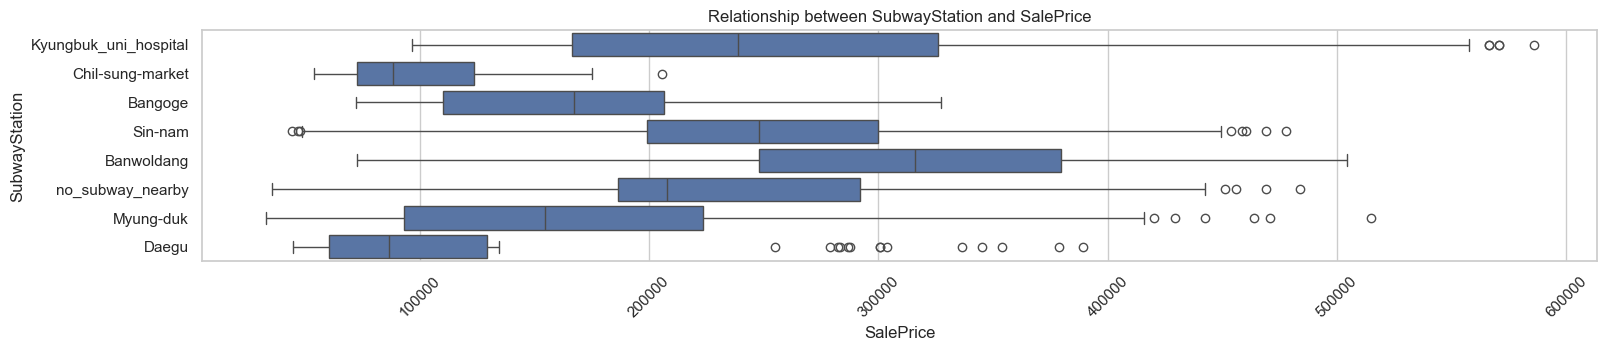

In [12]:
# Generating horizontal box plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(18, 3))
    sns.boxplot(data=df, y=col, x='SalePrice')
    plt.title(f'Relationship between {col} and SalePrice')
    plt.ylabel(col)
    plt.xlabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()


**Insight :**

1.	Distribusi Harga Berdasarkan Kategori:
	- Setiap boxplot menunjukkan distribusi harga apartemen (SalePrice) untuk tiap kategori pada variabel tertentu (misalnya, HallwayType atau SubwayStation).
	- Boxplot memberikan gambaran visual tentang median, kuartil, dan penyebaran data, sehingga kita bisa melihat kategori mana yang memiliki harga lebih tinggi atau lebih rendah.
	- TimeToSubway (Jarak ke Subway) berdampak signifikan pada harga. Apartemen yang lebih dekat dengan stasiun subway cenderung memiliki harga yang lebih tinggi, yang menekankan pentingnya akses transportasi dalam menentukan nilai properti.

2.	Outliers untuk Setiap Kategori:
	- Outliers pada boxplot ditandai dengan titik-titik yang berada jauh di luar whisker (garis ekor dari boxplot). Ini menunjukkan apartemen dengan harga yang jauh lebih tinggi atau lebih rendah dari mayoritas dalam kategori tersebut.
	- Misalnya, jika di kategori SubwayStation terdapat outliers di beberapa stasiun, itu bisa berarti beberapa apartemen dekat stasiun tersebut dijual dengan harga yang tidak wajar atau sangat berbeda dari yang lain.

3.	Perbandingan Harga Antar-Kategori:
	- Boxplot memungkinkan perbandingan langsung antar-kategori dalam variabel yang sama. Kategori yang memiliki boxplot dengan posisi lebih tinggi menunjukkan bahwa apartemen dalam kategori tersebut umumnya lebih mahal.
	- Misalnya, jika pada variabel SubwayStation terlihat bahwa apartemen di sekitar stasiun A memiliki rentang harga yang lebih tinggi dibandingkan stasiun B, kita bisa mengidentifikasi stasiun mana yang terkait dengan harga apartemen yang lebih tinggi.

4.	Rentang Harga dan Dispersi Data:
	- Panjang box (interquartile range/IQR) menunjukkan variabilitas harga dalam kategori tersebut. Rentang yang lebih panjang menunjukkan variasi harga yang lebih besar di dalam kategori tersebut.
	- Jika ada kategori dengan boxplot yang sangat panjang, ini menunjukkan bahwa harga apartemen di kategori tersebut bervariasi secara signifikan. Sebaliknya, kategori dengan boxplot yang pendek memiliki rentang harga yang lebih konsisten.

5.	Insight untuk Pemodelan:
	- Dari boxplot ini, Anda dapat menentukan kategori mana yang memiliki pengaruh lebih besar terhadap harga apartemen. Kategori dengan distribusi harga yang sangat berbeda dari yang lain menjadi fitur penting untuk model prediksi harga.
	- Sebaliknya, kategori yang distribusi harganya serupa atau memiliki sedikit variasi tidak terlalu penting untuk model.

In [13]:
sebelum_2000 = pd.DataFrame(df[df['YearBuilt'] < 2000])
setelah_2000 = pd.DataFrame(df[df['YearBuilt'] >= 2000])

In [14]:
mean_sebelum = sebelum_2000['SalePrice'].mean()
print('Rata-rata harga apartemen yang dibangun sebelum tahun 2000: ', mean_sebelum)
mean_setelah = setelah_2000['SalePrice'].mean()
print('Rata-rata harga apartemen yang dibangun setelah tahun 2000: ', mean_setelah)
perbedaan_harga = mean_setelah - mean_sebelum
print('Perbedaan harga yang antara apartemen yang dibangun sebelum dan setelah tahun 2000: ', perbedaan_harga)

Rata-rata harga apartemen yang dibangun sebelum tahun 2000:  141118.23914823914
Rata-rata harga apartemen yang dibangun setelah tahun 2000:  255700.82460372156
Perbedaan harga yang antara apartemen yang dibangun sebelum dan setelah tahun 2000:  114582.58545548242


**Insight :**

- Berdasarkan hasil penghitungan rata-rata harga apartemen yang dibangun sebelum dan setelah tahun 2000
dengan menggunakan asumsi kurs uang adalah KRW, maka perbedaan harga yang ada terhitung signifikan dengan perbedaan sebesar ₩119902.

## **3. Data Preprocessing**

#### **Data Outliers**

In [15]:
outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []
percent_outlier = []

filtered_entries = np.array([True] * len(df))
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - (IQR * 1.5)
    high_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_bound) & (df[col] <= high_bound))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_bound)
    high_lim.append(high_bound)
    outlier_count = len(df[~filter_outlier])

    filtered_entries = ((df[col] >= low_bound) & (df[col] <= high_bound)) & filtered_entries
    percent_outlier.append(round((outlier_count / len(df)) * 100, 2))

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name" : numeric_columns,
    "is Outlier" : is_outlier,
    "Lower bound" : low_lim,
    "Upper bound" : high_lim,
    "Outlier" : outlier,
    "No Outlier" : no_outlier,
    "Percent Outlier (%)" : percent_outlier
})

Outlier All Data : 108
Not Outlier All Data : 4015



,Column Name,is Outlier,Lower bound,Upper bound,Outlier,No Outlier,Percent Outlier (%)
0,N_FacilitiesNearBy(ETC),False,-7.5,12.5,0,4123,0.00
1,N_FacilitiesNearBy(PublicOffice),False,0.0,8.0,0,4123,0.00
2,N_SchoolNearBy(University),False,-1.0,7.0,0,4123,0.00
3,N_Parkinglot(Basement),False,-737.0,1719.0,0,4123,0.00
4,YearBuilt,False,1970.5,2030.5,0,4123,0.00
5,N_FacilitiesInApt,False,-0.5,11.5,0,4123,0.00
6,Size(sqf),True,-113.5,1906.5,98,4025,2.38
7,SalePrice,True,-74845.0,510747.0,27,4096,0.65


**Insight :**

1.	Kolom dengan Outlier:
	- Kolom Size(sqf) dan SalePrice memiliki outlier.
	- Kolom Size(sqf) memiliki 98 outlier (2.38% dari total data).
	- Kolom SalePrice memiliki 27 outlier (0.65% dari total data).
	- Kolom lain, seperti N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, dan N_FacilitiesInApt, tidak memiliki outlier dalam rentang yang dihitung berdasarkan IQR (Interquartile Range).

2.	Lower Bound dan Upper Bound:
	- Batas bawah dan batas atas untuk mendeteksi outlier telah dihitung menggunakan IQR. Sebagai contoh:
	- Untuk kolom Size(sqf), batas bawah adalah -113.5 dan batas atas adalah 1906.5. Nilai yang berada di luar rentang ini dianggap sebagai outlier.
	- Untuk kolom SalePrice, batas bawah adalah -74845.0 dan batas atas adalah 510747.0.

3.	Jumlah dan Persentase Outlier:
	- Meskipun kolom Size(sqf) memiliki persentase outlier tertinggi (2.38%), persentase ini masih relatif kecil dibandingkan dengan keseluruhan data.
	- SalePrice memiliki persentase outlier yang lebih kecil (0.65%), yang artinya mayoritas data harga apartemen tidak mengandung outlier.

4.	Tidak Ada Outlier untuk Beberapa Kolom:
	- Kolom-kolom seperti N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), dan N_SchoolNearBy(University) tidak mengandung outlier karena semua data berada dalam batas bawah dan atas yang dihitung berdasarkan IQR.

In [16]:
def find_anomalies(data):
    # Menghitung IQR untuk Income
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batasan outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = (data < lower_bound) | (data > upper_bound)

    # Identifikasi outliers
    print(f'IQR : {IQR}')
    print(f'Lower bound : {lower_bound}')
    print(f'Upper bound : {upper_bound}')
    print(f'Outliers : {outliers.sum()}')

In [17]:
find_anomalies(df['Size(sqf)'])

IQR : 505.0
Lower bound : -113.5
Upper bound : 1906.5
Outliers : 98


In [18]:
find_anomalies(df['SalePrice'])

IQR : 146398.0
Lower bound : -74845.0
Upper bound : 510747.0
Outliers : 27


**Insight :**

- Dalam kasus ini, outlier pada data `SalePrice` tidak di-drop karena masih merepresentasikan harga asli pasar<br>
Source: https://www.numbeo.com/cost-of-living/in/Daegu

#### **Data Cleaning**

In [5]:
print(f'Jumlah baris dan kolom : {df.shape}')
nilai_unique = df.apply(lambda x: x.unique())

info = pd.DataFrame({'type' : df.dtypes,
              'null' : df.isna().sum(),
              'unique' : df.nunique(),
              'duplicate' : df.duplicated().sum(),
              'nilai unique' : nilai_unique}
              )
info

Jumlah baris dan kolom : (4123, 11)


,type,null,unique,duplicate,nilai unique
HallwayType,object,0,3,1422,"[terraced, mixed, corridor]"
TimeToSubway,object,0,5,1422,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
SubwayStation,object,0,8,1422,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
N_FacilitiesNearBy(ETC),float64,0,4,1422,"[0.0, 1.0, 5.0, 2.0]"
N_FacilitiesNearBy(PublicOffice),float64,0,8,1422,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
N_SchoolNearBy(University),float64,0,6,1422,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
N_Parkinglot(Basement),float64,0,20,1422,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
YearBuilt,int64,0,16,1422,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
N_FacilitiesInApt,int64,0,9,1422,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
Size(sqf),int64,0,89,1422,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df['TimeToSubway'].replace({'10min~15min' : '10min-15min', '15min~20min' : '15min-20min', '5min~10min' : '5min-10min'}, inplace=True)
df['TimeToSubway'].unique()

array(['0-5min', '10min-15min', '15min-20min', '5min-10min',
       'no_bus_stop_nearby'], dtype=object)

In [22]:
df['SubwayStation'].replace({'Kyungbuk_uni_hospital': 'Kyungbuk-uni-hospital'}, inplace=True)
df['SubwayStation'].unique()

array(['Kyungbuk-uni-hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [23]:
#mengubah tipe data seluruh N_FacilitiesNearBy dan N_Parkinglot(Basement) menjadi int
df['N_FacilitiesNearBy(ETC)'] = df['N_FacilitiesNearBy(ETC)'].astype(np.int64)
df['N_FacilitiesNearBy(PublicOffice)'] = df['N_FacilitiesNearBy(PublicOffice)'].astype(np.int64)
df['N_SchoolNearBy(University)'] = df['N_SchoolNearBy(University)'].astype(np.int64)
df['N_Parkinglot(Basement)'] = df['N_Parkinglot(Basement)'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [24]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


## **4. Modeling**

In [25]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **Collinearity**

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    # Select only columns that are numeric
    features = df[numeric_columns]

    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

    return vif_data

vif_result = calculate_vif(df)
print(vif_result)

                           Variable        VIF
0           N_FacilitiesNearBy(ETC)   6.017004
1  N_FacilitiesNearBy(PublicOffice)  14.013848
2        N_SchoolNearBy(University)  16.377643
3            N_Parkinglot(Basement)  11.792914
4                         YearBuilt  30.945491
5                 N_FacilitiesInApt  27.504934
6                         Size(sqf)  14.452162
7                         SalePrice  19.109512


**Insight :**

1.	Multikolinearitas Tinggi:
	- Beberapa variabel memiliki VIF yang sangat tinggi, terutama variabel YearBuilt (30.95), N_FacilitiesInApt (27.50), dan SalePrice (19.10). Ini menunjukkan bahwa variabel-variabel ini memiliki korelasi yang sangat kuat dengan variabel lainnya di dataset.
	- VIF di atas 10 menandakan adanya multikolinearitas yang signifikan. Dalam kasus ini, multikolinearitas dapat mempengaruhi stabilitas model regresi dan mengurangi keakuratan prediksi.

### **Define x and y**

In [27]:
x = df.drop(columns='SalePrice')
y = df['SalePrice'].copy()

In [28]:
y

0       346017
1       150442
2        61946
3       165486
4       311504
         ...  
4116    290265
4117    345132
4118    323008
4119    242477
4121     73451
Name: SalePrice, Length: 2701, dtype: int64

### **Data Splitting**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0,
                                                    test_size=0.2)

In [30]:
x.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0-5min,Kyungbuk-uni-hospital,0,3,2,1270,2007,10,1387
1,terraced,10min-15min,Kyungbuk-uni-hospital,1,5,1,0,1986,4,914
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743


In [31]:
x.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object')

### **Encoding**

- Onehot : 'HallwayType', 'SubwayStation'
- Ordinal : 'TimeToSubway'
- Robust : 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'

In [32]:
x.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0-5min,Kyungbuk-uni-hospital,0,3,2,1270,2007,10,1387
1,terraced,10min-15min,Kyungbuk-uni-hospital,1,5,1,0,1986,4,914
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743


In [33]:
x['TimeToSubway'].unique()

array(['0-5min', '10min-15min', '15min-20min', '5min-10min',
       'no_bus_stop_nearby'], dtype=object)

In [34]:
map = [{
    'col' : 'TimeToSubway',
    'mapping' : {'no_bus_stop_nearby' : 0, '0-5min' : 1, '5min-10min' : 2, '10min-15min' : 3, '15min-20min' : 4}
}]

In [35]:
ordinal = OrdinalEncoder(mapping=map)

pipe_ord_robust = Pipeline([
    ('ordinal', ordinal),
    ('robust', RobustScaler())
])

In [36]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['HallwayType', 'SubwayStation']),
    ('pipe_ord_robust', pipe_ord_robust, ['TimeToSubway']),
    ('robust', RobustScaler(), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)'])
], remainder='passthrough')

In [37]:
# define model
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
lasso = Lasso(random_state=0)
ridge = Ridge(random_state=0)
xgboost = xgb.XGBRegressor(random_state=0)

# scoring -> rmse, mae, mape
scorer = [
    'neg_root_mean_squared_error',
    'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error'
]

### **Benchmark Model**

In [38]:
# pip list

In [39]:
list_algo = [linreg, knn, tree, rf, lasso, ridge, xgboost]

list_all_rmse = []
list_rmse = []
list_std_rmse = []

list_mae = []
list_std_mae = []

list_mape = []
list_std_mape = []

for algo in list_algo:
        # pipe model
        pipe_trans_model = Pipeline([('prepocessing', transformer),
                                     ('model', algo)])

        # cross validation
        cv_score=cross_validate(estimator=pipe_trans_model,
                        X=x_train,
                        y=y_train,
                        cv=5,
                        scoring=scorer)
        
        list_all_rmse.append(cv_score['test_neg_root_mean_squared_error'].round())
        list_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
        list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())

        list_mae.append(cv_score['test_neg_mean_absolute_error'].mean())
        list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())

        list_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
        list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

In [40]:
df_metrics = pd.DataFrame({
    'model' : list_algo,
    'all' : list_all_rmse,
    'rmse_mean' : list_rmse,
    'rmse_std' : list_std_rmse,
    'mae_mean' : list_mae,
    'mae_std' : list_std_mae,
    'mape_mean' : list_mape,
    'mape_std' : list_std_mape
})

df_metrics

,model,all,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
0,LinearRegression(),"[-49486.0, -51109.0, -55831.0, -52997.0, -5193...",-52271.558875,2117.771876,-42577.681019,1662.975017,-0.221914,0.015491
1,KNeighborsRegressor(),"[-49399.0, -46167.0, -53519.0, -49848.0, -5123...",-50032.877572,2407.141566,-39849.926389,1731.506662,-0.205056,0.014192
2,DecisionTreeRegressor(random_state=0),"[-44556.0, -44661.0, -49997.0, -46643.0, -4769...",-46710.625523,2030.864189,-37659.339352,1051.893623,-0.194767,0.009949
3,RandomForestRegressor(random_state=0),"[-44324.0, -44585.0, -49361.0, -46513.0, -4773...",-46504.100893,1903.714373,-37585.798917,1072.900632,-0.194520,0.009371
4,Lasso(random_state=0),"[-49448.0, -51165.0, -55906.0, -52669.0, -5185...",-52207.754079,2131.496231,-42474.602442,1604.844721,-0.219677,0.014487
5,Ridge(random_state=0),"[-49445.0, -51123.0, -55904.0, -52677.0, -5184...",-52198.806123,2136.798624,-42473.974686,1612.352682,-0.219650,0.014495
6,"XGBRegressor(base_score=None, booster=None, ca...","[-44174.0, -44661.0, -49286.0, -46641.0, -4769...",-46491.377079,1897.412935,-37592.791495,1042.059066,-0.194183,0.008972


Dari hasil evaluasi berbagai model regresi menggunakan metrik RMSE, MAE, dan MAPE, berikut adalah beberapa insight yang dapat diambil:

1.	Performa Model Berdasarkan RMSE:
	- Model dengan RMSE terendah adalah XGBoost (-46491.38), Random Forest (-46504.10) dan Desicion Tree (-46710.62) yang menunjukkan bahwa kedua model ini memiliki performa terbaik dalam hal memprediksi harga apartemen secara akurat.
	- Model Linear Regression, Lasso, dan Ridge memiliki RMSE yang lebih tinggi (sekitar -52207 hingga -52271). Ini menunjukkan bahwa model linear memiliki kesulitan dalam menangkap pola kompleks dalam data.

2.	Performa Berdasarkan MAE (Mean Absolute Error):
	- Dalam hal MAE, model dengan MAE terendah adalah XGBoost (-37592.79) dan Random Forest (-37585.80). Ini mengindikasikan bahwa rata-rata kesalahan prediksi pada kedua model ini lebih kecil dibandingkan model lainnya.
	- Decision Tree juga cukup baik dengan MAE sebesar (-37659.34). Sementara Linear Regression, Lasso, dan Ridge memiliki kesalahan rata-rata lebih tinggi (sekitar -42400 hingga -42577).

3.	Performa Berdasarkan MAPE (Mean Absolute Percentage Error):
	- MAPE menunjukkan kesalahan dalam persentase, dan lagi-lagi, model dengan MAPE terendah adalah XGBoost (-0.1942) dan Random Forest (-0.1945), yang berarti prediksi kedua model ini lebih mendekati harga sebenarnya dalam persentase.
	- Linear Regression, Lasso, dan Ridge memiliki MAPE yang lebih tinggi (sekitar -0.219 hingga -0.221), menunjukkan performa yang lebih buruk dalam hal akurasi persentase.

4.	Stabilitas Model:
	- Standard deviation (std) untuk setiap metrik menunjukkan seberapa stabil performa model di berbagai iterasi cross-validation.
	- XGBoost dan Random Forest menunjukkan standar deviasi yang rendah di ketiga metrik (RMSE, MAE, dan MAPE), yang berarti performa mereka relatif konsisten di berbagai iterasi.
	- Model linear seperti Linear Regression, Lasso, dan Ridge menunjukkan standar deviasi yang sedikit lebih tinggi, menandakan bahwa performa mereka lebih bervariasi.

**Kesimpulan:**
- XGBoost, Random Forest dan Decision Tree merupakan model terbaik dalam hal prediksi harga apartemen berdasarkan data yang ada, dengan kesalahan yang paling rendah dan konsistensi yang baik.
- Model linear seperti Linear Regression, Lasso, dan Ridge cenderung kurang mampu menangkap hubungan non-linear yang lebih kompleks dalam data.
- XGBoost dan Random Forest sangat direkomendasikan untuk dipertimbangkan lebih lanjut dalam pemodelan ini karena mereka menghasilkan hasil yang lebih akurat dan stabil.

### **Prediction to 3 Best Model**

In [41]:
?xgb.XGBRegressor

Init signature:
xgb.XGBRegressor(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : typing.Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with

In [42]:
# Benchmark 3 model terbaik
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0),
    'XGBoost': xgb.XGBRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])
    
    # cross validation
    cv_score=cross_validate(estimator=model,
                        X=x_train,
                        y=y_train,
                        cv=5,
                        scoring=scorer)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
Decision Tree,47446.754649,37583.214907,0.187975
RandomForest,47363.535181,37651.580949,0.188506
XGBoost,46934.687586,37357.721544,0.184824


Dari hasil benchmarking tiga model terbaik (Decision Tree, Random Forest, dan XGBoost) pada test set, berikut adalah beberapa insight yang dapat diambil:

1.	Performa Model Berdasarkan RMSE (Root Mean Squared Error):
	- XGBoost memiliki nilai RMSE terendah sebesar 46934.69, diikuti oleh Random Forest (47363.54) dan terakhir Decision Tree (47446.75).
	- Hal ini menunjukkan bahwa XGBoost memberikan prediksi yang lebih akurat dalam hal kesalahan kuadrat rata-rata.

2.	Performa Model Berdasarkan MAE (Mean Absolute Error):
	- Dalam hal MAE, XGBoost juga memiliki nilai terendah (37357.72), diikuti oleh Decision Tree (37583.21) dan Random Forest (37651.58).
	- Ini mengindikasikan bahwa model XGBoost menghasilkan kesalahan absolut rata-rata yang paling kecil, artinya prediksi harga apartemen paling mendekati harga sebenarnya.

3.	Performa Berdasarkan MAPE (Mean Absolute Percentage Error):
	- XGBoost lagi-lagi unggul dengan MAPE terendah (0.1848), diikuti oleh Decision Tree (0.1880) dan Random Forest (0.1885).
	- Ini berarti dalam persentase, XGBoost lebih akurat dalam memprediksi harga apartemen dibandingkan model lainnya.

4.	Kesimpulan Umum:
	- Dari ketiga metrik (RMSE, MAE, MAPE), model XGBoost consistently menghasilkan performa terbaik dibandingkan Random Forest dan Decision Tree.
	- Random Forest dan Decision Tree memiliki performa yang sangat mirip, tetapi keduanya masih sedikit di bawah XGBoost dalam hal ketepatan prediksi.
	- Berdasarkan hasil ini, XGBoost dapat dipilih sebagai model utama untuk melanjutkan ke tahap tuning atau deployment, karena memberikan hasil yang lebih baik dalam memprediksi harga apartemen.

### **Hyperparameter Tuning**

In [43]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 11)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(0, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

In [44]:
# Hyperparam
hyperparam_tree = {
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'model__max_depth': range(2,100),
    'model__min_samples_split': range(2,100),
    'model__min_samples_leaf': range(2,100),
    'model__max_features': range(2,100)
}

hyperparam_rf = {
    'model__n_estimators'  : range(50,200),
    'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__max_depth': range(2,100),
    'model__min_samples_split': range(2,100),
    'model__min_samples_leaf': range(2,100),
    'model__max_features': range(2,100)
}

hyperparam_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [45]:
# Benchmark model dengan hyperparameter tuning
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgboost = xgb.XGBRegressor(random_state=0)

# Membuat algorithm chains
pipe_tree = Pipeline([
    ('preprocessing', transformer),
    ('model', tree)
])

pipe_rf = Pipeline([
    ('prepocessing', transformer),
    ('model', rf)
])

pipe_xgb = Pipeline([
    ('prepocessing', transformer),
    ('model', xgboost)
])

# cross validate
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
randsearch_tree = RandomizedSearchCV(
    estimator=pipe_tree, 
    param_distributions=hyperparam_tree,
    n_iter=100,
    cv=crossval, 
    scoring=scorer, 
    n_jobs=-1,
    refit='neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state=0
)

randsearch_rf = RandomizedSearchCV(
    estimator=pipe_rf, 
    param_distributions = hyperparam_rf,
    n_iter=100,
    cv=crossval, 
    scoring=scorer, 
    n_jobs=-1,
    refit='neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state=0
)

randsearch_xgb = RandomizedSearchCV(
    estimator=pipe_xgb, 
    param_distributions = hyperparam_xgb,
    n_iter=100,
    cv=crossval, 
    scoring=scorer, 
    n_jobs=-1,
    refit='neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state=0
)

In [46]:
# Lakukan fitting untuk setiap RandomizedSearchCV dengan data training
randsearch_tree.fit(x_train, y_train)
randsearch_rf.fit(x_train, y_train)
randsearch_xgb.fit(x_train, y_train)

# Define model terhadap estimator terbaik untuk ketiga model
tree_tuning = randsearch_tree.best_estimator_
rf_tuning = randsearch_rf.best_estimator_
xgb_tuning = randsearch_xgb.best_estimator_

In [47]:
# Fitting model untuk ketiga model
tree_tuning.fit(x_train, y_train)
rf_tuning.fit(x_train, y_train)
xgb_tuning.fit(x_train, y_train)

# Predict test set untuk ketiga model
y_pred_tree_tuning = tree_tuning.predict(x_test)
y_pred_rf_tuning = rf_tuning.predict(x_test)
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

In [48]:
# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning untuk ketiga model
rmse_tree_tuning = np.sqrt(mean_squared_error(y_test, y_pred_tree_tuning))
mae_tree_tuning = mean_absolute_error(y_test, y_pred_tree_tuning)
mape_tree_tuning = mean_absolute_percentage_error(y_test, y_pred_tree_tuning)

rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Simpan nilai metrics dalam DataFrame
score_after_tuning = pd.DataFrame({
    'Decision Tree': {'RMSE': rmse_tree_tuning, 'MAE': mae_tree_tuning, 'MAPE': mape_tree_tuning},
    'Random Forest Regressor': {'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning},
    'XBGoost': {'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}
})

score_after_tuning

,Decision Tree,Random Forest Regressor,XBGoost
RMSE,46612.693126,49303.704322,46374.356693
MAE,37214.451349,38585.926009,36945.157304
MAPE,0.187876,0.199351,0.183839


1. Setelah melakukan tuning pada model Decision Tree, Random Forest, dan XGBoost, hasil kinerja diukur menggunakan RMSE, MAE, dan MAPE. Berikut adalah temuan utamanya:
	- XGBoost menghasilkan performa terbaik di antara ketiga model, dengan nilai:
		- RMSE: `46,374` (terendah)
		- MAE: `36,945` (terendah)
		- MAPE: `0.1838` (terendah)

	- Decision Tree menghasilkan performa yang lebih baik daripada Random Forest dalam hal RMSE dan MAE, tetapi sedikit lebih buruk dalam hal MAPE:
		- RMSE: 46,612 (lebih tinggi dari XGBoost, tetapi lebih rendah dari Random Forest)
		- MAE: 37,214 (lebih tinggi dari XGBoost, tetapi lebih rendah dari Random Forest)
		- MAPE: 0.1878 (lebih tinggi dari XGBoost, tetapi lebih rendah dari Random Forest)

	- Random Forest menunjukkan performa yang relatif lebih buruk setelah tuning dibandingkan dengan XGBoost dan Decision Tree:
		- RMSE: 49,303 (tertinggi dari ketiga model)
		- MAE: 38,585 (tertinggi dari ketiga model)
		- MAPE: 0.1993 (tertinggi dari ketiga model)

2. Efektivitas Hyperparameter Tuning:
	- XGBoost memperoleh manfaat paling besar dari hyperparameter tuning, mengungguli model lain dalam semua metrik. Ini mengindikasikan bahwa XGBoost dapat beradaptasi lebih baik dengan penyesuaian hyperparameter, yang membuatnya lebih unggul dalam memprediksi SalePrice di dataset ini.
	- Decision Tree juga menunjukkan peningkatan performa, tetapi tidak seefektif XGBoost. Ini mungkin karena model ini lebih sederhana, sehingga meskipun tuning dilakukan, peningkatan performanya tidak sebesar XGBoost.
	- Random Forest meskipun telah di-tuning, performanya justru sedikit menurun dibandingkan dengan Decision Tree dan XGBoost. Hal ini bisa disebabkan oleh overfitting atau kompleksitas model yang tidak dapat diselaraskan dengan baik melalui tuning.

3. Kesimpulan dan Rekomendasi:
	- XGBoost adalah pilihan terbaik untuk kasus ini setelah hyperparameter tuning. Dengan RMSE, MAE, dan MAPE yang paling rendah, model ini mampu menghasilkan prediksi yang lebih akurat dibandingkan model lain.
	- Decision Tree bisa menjadi pilihan yang layak jika Anda menginginkan model yang lebih sederhana tetapi masih kompetitif.
	- Random Forest perlu diperiksa lebih lanjut untuk memahami mengapa tuning tidak memberikan hasil yang lebih baik, mungkin diperlukan lebih banyak eksperimen dengan parameter yang berbeda atau bahkan metode tuning yang lebih dalam.

Secara keseluruhan, XGBoost memberikan hasil terbaik, dan tuning membantu meningkatkan prediksi dari semua model, meskipun dalam berbagai tingkat efektivitas.

### **Final Model**

In [49]:
# Final Model: melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE
pd.DataFrame(randsearch_xgb.cv_results_).sort_values(['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
59,0.172138,0.032462,0.020140,0.006145,0.8,1.291550,102,3,0.15,1,...,891.688945,7,-0.203931,-0.199359,-0.186780,-0.186397,-0.190566,-0.193407,0.007033,8
94,0.223071,0.044288,0.020792,0.014040,0.5,1.291550,171,3,0.08,7,...,781.883344,25,-0.204217,-0.200122,-0.187214,-0.186029,-0.193365,-0.194189,0.007095,37
70,0.103415,0.027632,0.012297,0.002944,0.6,0.059948,141,2,0.27,1,...,723.168377,43,-0.202935,-0.200347,-0.188310,-0.187764,-0.194855,-0.194842,0.006141,49
68,0.109607,0.029224,0.013098,0.003696,0.6,0.464159,179,2,0.27,8,...,718.252385,44,-0.203486,-0.199700,-0.187176,-0.189135,-0.193526,-0.194605,0.006182,46
89,0.265017,0.055331,0.015214,0.003992,0.3,0.059948,164,4,0.09,9,...,906.825845,18,-0.203669,-0.198657,-0.188311,-0.184845,-0.192779,-0.193652,0.006815,23


1. Tabel ini menampilkan hasil evaluasi hyperparameter tuning dari berbagai kombinasi parameter, diurutkan berdasarkan rank_test_neg_mean_absolute_percentage_error. Peringkat ini mengindikasikan seberapa baik model tersebut dalam memprediksi dengan akurasi tinggi. Berikut beberapa kombinasi parameter yang menempati peringkat teratas:
	- Kombinasi dengan rank 1 memiliki hyperparameter:
		- subsample: 0.8 (80% dari total data digunakan untuk setiap pohon)
		- reg_alpha: 1.291550 (parameter regularisasi untuk membuat model lebih sederhana)
		- n_estimators: 102 (jumlah pohon yang digunakan)
		- max_depth: 3 (kedalaman maksimum pohon)
		- learning_rate: 0.15 (learning rate yang relatif rendah untuk memperhalus perubahan)
		- Kombinasi ini menunjukkan hasil terbaik dalam hal MAPE (mean absolute percentage error) dengan nilai -0.193407, yang diartikan sebagai nilai kesalahan rata-rata 19.34%.

2. Waktu Komputasi:

	- Kombinasi peringkat atas memiliki waktu komputasi yang relatif singkat, dengan mean_fit_time bervariasi antara 0.1 hingga 0.15 detik per iterasi. Hal ini menunjukkan bahwa model XGBoost dapat dilatih dengan cepat bahkan ketika menggunakan cross-validation.
	- Perbedaan waktu komputasi tidak terlalu signifikan antara berbagai kombinasi parameter, sehingga tidak ada trade-off besar antara akurasi model dan waktu pelatihan.

3. Kesimpulan:
	- Kombinasi subsample 0.8, reg_alpha 1.291550, n_estimators 102, max_depth 3, dan learning_rate 0.15 memberikan hasil terbaik dengan nilai MAPE terendah.
	- Tuning hyperparameter secara efektif mengoptimalkan model XGBoost untuk meminimalkan kesalahan persentase prediksi, menghasilkan model yang lebih presisi dan stabil.
	- Perlu diingat bahwa variabilitas antara kombinasi terbaik sangat kecil, sehingga model lain di peringkat atas juga bisa menjadi alternatif yang baik jika ada trade-off terkait parameter lainnya.

In [50]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', randsearch_xgb.best_score_)
print('Best_params:', randsearch_xgb.best_params_)

XGBoost
Best_score: -46188.535965905336
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 102, 'model__max_depth': 3, 'model__learning_rate': 0.15, 'model__gamma': 1, 'model__colsample_bytree': 0.6}


Dari hasil di atas, ada beberapa insight yang bisa diperoleh terkait model XGBoost yang telah di-tuning menggunakan RandomizedSearchCV:

1. Best Score:
	- Best Score yang diperoleh adalah -46188.54. Ini adalah hasil dari metrik negatif Root Mean Squared Error (RMSE) pada data validasi selama cross-validation. Karena nilai yang dikembalikan adalah negatif, maka RMSE terbaik untuk model ini adalah sekitar 46,188.54.

	- Interpretasi:
		- RMSE yang lebih rendah berarti model memiliki kesalahan prediksi yang lebih kecil dan lebih akurat dalam memprediksi nilai target.

2. Best Params:
	- Berikut adalah parameter terbaik yang dipilih oleh proses tuning:
		- subsample: 0.8 (80% data digunakan untuk setiap pohon)
		- reg_alpha: 1.29154 (regularisasi untuk menghindari overfitting)
		- n_estimators: 102 (jumlah pohon dalam model)
		- max_depth: 3 (kedalaman maksimum setiap pohon)
		- learning_rate: 0.15 (tingkat pembelajaran yang mengontrol seberapa besar model menyesuaikan setiap pohon)
		- gamma: 1 (threshold untuk membuat model lebih konservatif dalam membagi node)
		- colsample_bytree: 0.6 (60% fitur yang digunakan di setiap pohon)

	- Interpretasi:
		- subsample 0.8: Menggunakan sebagian dari data (80%) membantu menghindari overfitting sambil tetap menggunakan cukup banyak data untuk menjaga kinerja model.
		- max_depth 3: Batasan ini membuat pohon lebih dangkal, membantu menghindari overfitting dengan model yang lebih sederhana dan generalizable.
		- learning_rate 0.15: Learning rate yang cukup kecil memastikan model belajar secara bertahap, sehingga mengurangi risiko overfitting.
		- reg_alpha: Regularisasi ini menekan koefisien model agar tidak terlalu besar, yang membantu mencegah overfitting.
		- gamma 1: Nilai gamma yang tinggi membuat model lebih konservatif saat membagi node, sehingga hanya pembagian yang benar-benar signifikan yang dilakukan.
		- colsample_bytree 0.6: Menggunakan 60% dari fitur yang tersedia pada setiap pohon membantu dalam menciptakan variasi antar pohon, yang seringkali meningkatkan performa model ensemble seperti XGBoost.

3. Kesimpulan:
	- Model XGBoost yang di-tuning ini cenderung lebih konservatif dengan parameter seperti max_depth yang rendah dan gamma yang tinggi, mengindikasikan bahwa model mencoba mencegah overfitting.
	- Kombinasi parameter terbaik yang dihasilkan oleh RandomizedSearchCV telah meminimalkan RMSE, yang berarti model ini memberikan prediksi yang relatif akurat, meskipun ada ruang untuk perbaikan lebih lanjut jika diperlukan.
	- Model ini sudah optimal berdasarkan parameter yang telah dicoba, namun tetap dapat ditingkatkan dengan evaluasi ulang data, fitur yang digunakan, atau algoritma lain.

In [51]:
# Model xgb
model = {'XGBoost': xgb.XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
tree_tuning = randsearch_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,46374.356693,36945.157304,0.183839


In [52]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,RMSE,MAE,MAPE
XGBoost,46934.687586,37357.721544,0.184824


In [53]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGBoost,46374.356693,36945.157304,0.183839


1. Perbandingan Model Sebelum dan Setelah Tuning
	- Tabel perbandingan hasil sebelum dan sesudah tuning menunjukkan bahwa tuning hyperparameter berhasil memberikan peningkatan performa pada model XGBoost:
		- RMSE (Root Mean Squared Error): Berkurang dari 46,934.69 menjadi 46,374.35.
		- MAE (Mean Absolute Error): Berkurang dari 37,357.72 menjadi 36,945.15.
		- MAPE (Mean Absolute Percentage Error): Turun dari 0.1848 menjadi 0.1838.

	- Insight:
		- Meskipun peningkatan tidak terlalu besar, model yang sudah di-tuning menunjukkan performa yang sedikit lebih baik dengan mengurangi kesalahan prediksi pada data uji. Ini menunjukkan bahwa tuning yang dilakukan efektif dalam meningkatkan performa model, meskipun perbaikannya tidak signifikan.

2. Evaluasi Kualitas Prediksi

	- RMSE yang lebih kecil menunjukkan bahwa rata-rata kesalahan prediksi untuk harga apartemen adalah sekitar 46,374.
	- MAE sebesar 36,945 menunjukkan bahwa secara rata-rata, model meleset sebesar itu dalam memprediksi harga apartemen.
	- MAPE sebesar 0.1838 (18.38%) menunjukkan bahwa kesalahan rata-rata relatif terhadap nilai aktualnya adalah sekitar 18.38%, yang bisa dianggap cukup tinggi, tetapi masih bisa diterima tergantung pada konteks aplikasi bisnis.

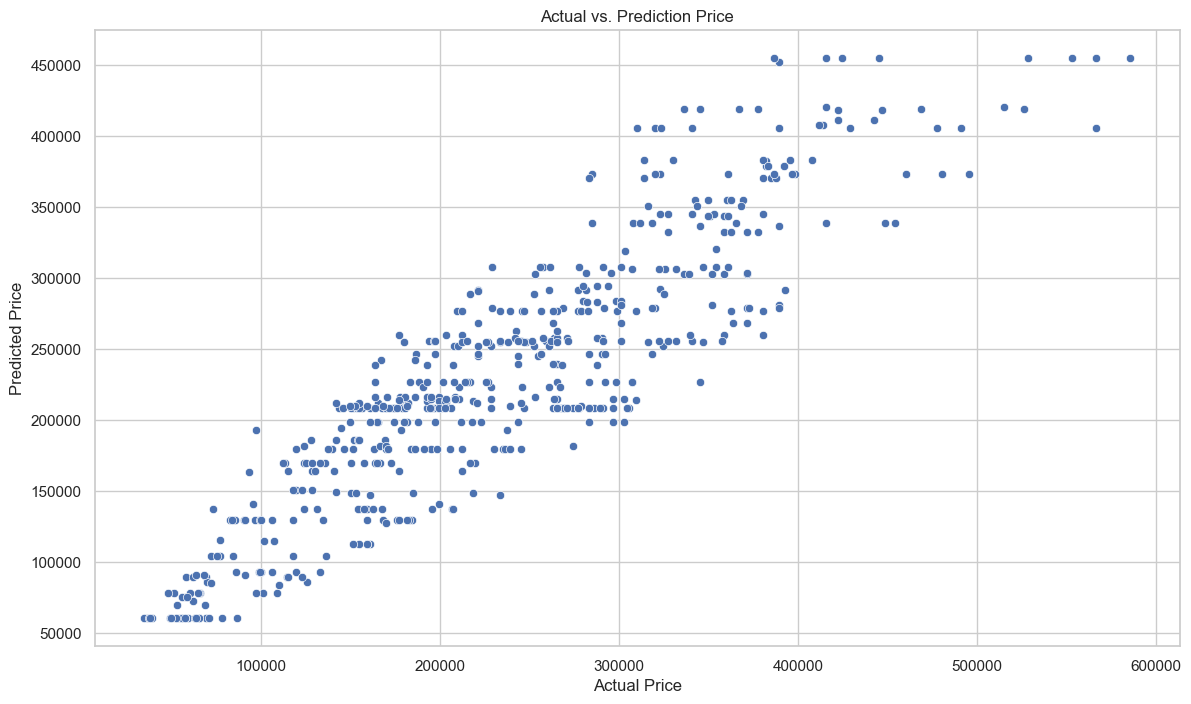

In [54]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

1. Visualisasi Scatter Plot (Actual vs. Prediction Price)
	- Pada plot, titik-titik menunjukkan hubungan antara harga aktual (di sumbu x) dan harga prediksi (di sumbu y). Tren umumnya mengikuti garis diagonal (prediksi mendekati harga aktual), tetapi beberapa titik tersebar jauh dari garis ini.

	- Insight:
		- Sebagian besar titik berada di sekitar garis diagonal, yang menunjukkan bahwa model memprediksi harga dengan cukup baik untuk sebagian besar data.|

### **Feature Importance**

In [55]:
xgb_tuning

Pipeline(steps=[('prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('pipe_ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': no_bus_stop_nearby    0
0-5min                1
5min-10min            2
10min-15min           3
15min-20min           4
dtype: int64}])),
                                                                  (...
                              feature_types=None, gamma=1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.15,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=102, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [56]:
xgb_tuning[0].get_feature_names_out()

array(['onehot__HallwayType_corridor', 'onehot__HallwayType_mixed',
       'onehot__HallwayType_terraced', 'onehot__SubwayStation_Bangoge',
       'onehot__SubwayStation_Banwoldang',
       'onehot__SubwayStation_Chil-sung-market',
       'onehot__SubwayStation_Daegu',
       'onehot__SubwayStation_Kyungbuk-uni-hospital',
       'onehot__SubwayStation_Myung-duk', 'onehot__SubwayStation_Sin-nam',
       'onehot__SubwayStation_no_subway_nearby',
       'pipe_ord_robust__TimeToSubway', 'robust__N_FacilitiesNearBy(ETC)',
       'robust__N_FacilitiesNearBy(PublicOffice)',
       'robust__N_SchoolNearBy(University)',
       'robust__N_Parkinglot(Basement)', 'robust__YearBuilt',
       'robust__N_FacilitiesInApt', 'robust__Size(sqf)'], dtype=object)

In [57]:
xgb_tuning['model'].feature_importances_

array([0.04992665, 0.01290744, 0.5656666 , 0.00513808, 0.00455774,
       0.00585761, 0.00196188, 0.01391715, 0.00187848, 0.02913474,
       0.00243109, 0.0077928 , 0.04691255, 0.01192732, 0.02004814,
       0.05020753, 0.05187239, 0.05713135, 0.06073051], dtype=float32)

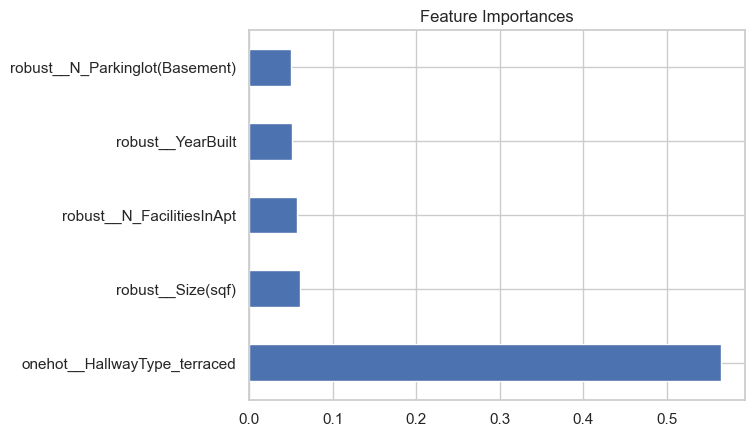

In [58]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, xgb_tuning[0].get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

**Insight :**

1. Feature Importance
	- Fitur onehot__HallwayType_terraced memiliki kontribusi terbesar dalam model XGBoost setelah tuning. Hal ini berarti, tipe Hallway (lorong) dengan model terraced paling berpengaruh terhadap prediksi harga apartemen di dataset ini.
	- Fitur robust__N_Parkinglot(Basement), robust__YearBuilt, robust__N_FacilitiesInApt, dan robust__Size(sqf) juga berpengaruh, namun dengan dampak yang lebih kecil dibandingkan fitur tipe hallway.

2. Insight dari Fitur Utama
	- HallwayType_terraced sebagai fitur utama yang paling signifikan menunjukkan bahwa tipe lorong terraced dalam sebuah apartemen memiliki kaitan erat dengan nilai atau harga properti. Bisa jadi, jenis lorong ini memberikan kenyamanan, privasi, atau daya tarik arsitektural yang lebih tinggi.
	- N_Parkinglot(Basement) juga memberikan kontribusi yang signifikan, yang menunjukkan bahwa apartemen yang memiliki jumlah parkir basement lebih banyak cenderung memengaruhi harga. Ini bisa berarti bahwa fasilitas parkir adalah faktor yang dipertimbangkan oleh pembeli.
	- YearBuilt yang mewakili tahun bangunan dibangun memiliki dampak yang moderat, yang artinya umur bangunan turut berperan dalam menentukan nilai apartemen (bangunan yang lebih baru atau lebih tua bisa dipersepsikan berbeda).
	- N_FacilitiesInApt (jumlah fasilitas di apartemen) dan Size(sqf) (luas apartemen) juga turut memengaruhi, tetapi tidak sebesar fitur HallwayType.

In [59]:
# pip install shap

In [60]:
import shap

In [61]:
xgb_tuning[0].transform(x_train)

array([[ 0.        ,  0.        ,  1.        , ...,  0.5       ,
         0.66666667,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.14285714,
         1.        , -0.19103774],
       [ 0.        ,  0.        ,  1.        , ...,  0.5       ,
         0.66666667,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.92857143,
        -0.33333333,  1.2759434 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.92857143,
        -0.33333333, -0.62735849],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.64622642]])

In [62]:
data = pd.DataFrame(xgb_tuning[0].transform(x_train), columns=xgb_tuning[0].get_feature_names_out())

In [63]:
data.head()

,onehot__HallwayType_corridor,onehot__HallwayType_mixed,onehot__HallwayType_terraced,onehot__SubwayStation_Bangoge,onehot__SubwayStation_Banwoldang,onehot__SubwayStation_Chil-sung-market,onehot__SubwayStation_Daegu,onehot__SubwayStation_Kyungbuk-uni-hospital,onehot__SubwayStation_Myung-duk,onehot__SubwayStation_Sin-nam,onehot__SubwayStation_no_subway_nearby,pipe_ord_robust__TimeToSubway,robust__N_FacilitiesNearBy(ETC),robust__N_FacilitiesNearBy(PublicOffice),robust__N_SchoolNearBy(University),robust__N_Parkinglot(Basement),robust__YearBuilt,robust__N_FacilitiesInApt,robust__Size(sqf)
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.2,0.5,0.5,0.638574,0.500000,0.666667,0.000000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.5,-0.2,-0.5,0.0,-0.098865,0.142857,1.000000,-0.191038
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.2,0.5,0.5,0.638574,0.500000,0.666667,0.000000
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.5,1.0,0.424635,-0.071429,0.666667,0.009434
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.2,-1.0,-0.5,-0.539708,0.214286,0.000000,0.589623


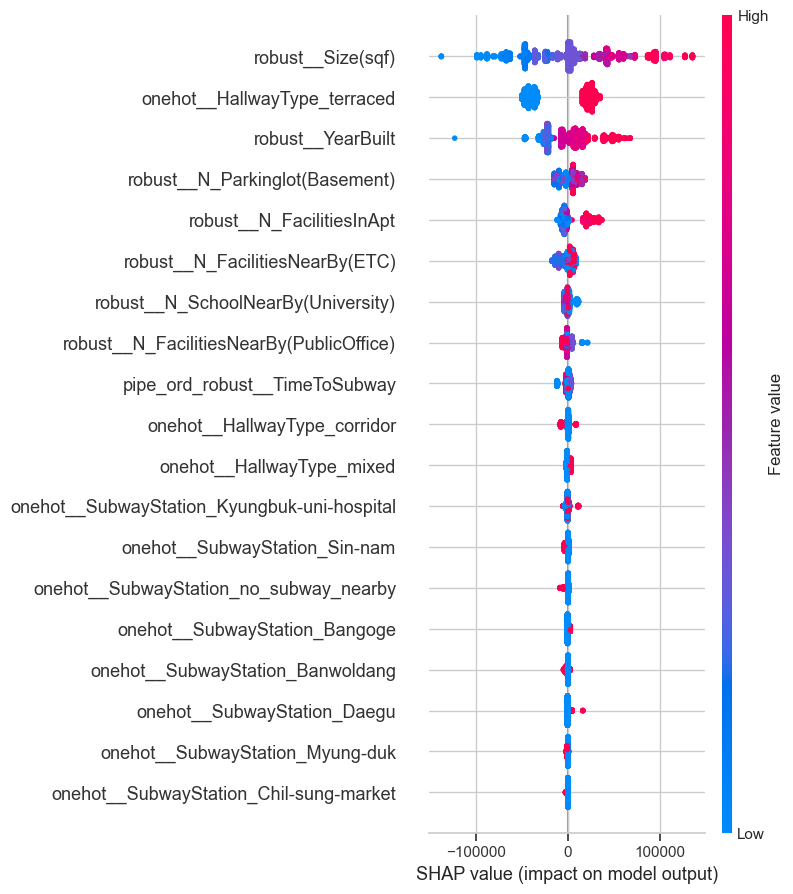

In [64]:
# define explainer
explainer = shap.TreeExplainer(
    xgb_tuning['model'],
    data = data   
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer.shap_values(data)

# tampilkan dalam bentuk plot
shap.summary_plot(shap_values, data, feature_names=data.columns)

**Insight :**

- Apartemen yang besar, baru, dekat dengan stasiun kereta, dan memiliki banyak fasilitas cenderung lebih mahal. Sebaliknya, apartemen yang lebih kecil, lebih tua, atau jauh dari transportasi umum lebih murah.

## **5. Conclusion**

Berdasarkan hasil pemodelan regresi pada data apartemen di Daegu, beberapa kesimpulan penting yang dapat diambil:

1.	Ukuran Apartemen sebagai Faktor Dominan:
    - Ukuran apartemen (dalam meter persegi) adalah faktor yang paling signifikan dalam menentukan harga apartemen. Apartemen yang lebih besar cenderung memiliki harga yang lebih tinggi secara signifikan dibandingkan dengan apartemen yang lebih kecil.

2.	Fasilitas di Dalam Gedung Mempengaruhi Harga:
    - Fasilitas yang terdapat di dalam apartemen, seperti jumlah area parkir di basement dan jumlah fasilitas di sekitar apartemen (sekolah, kantor publik, dll.), memiliki pengaruh yang besar terhadap harga. Apartemen dengan fasilitas yang lebih lengkap mendapatkan harga yang lebih tinggi.

3.	Pengaruh Tipe Lorong (Hallway Type):
    - Tipe lorong apartemen juga merupakan faktor yang penting. Apartemen dengan lorong bertipe “terraced” memiliki harga yang lebih tinggi dibandingkan dengan tipe lorong lain seperti “corridor” atau “mixed.”

4.	Akses ke Stasiun Kereta Bawah Tanah:
    - Meskipun pengaruh akses ke stasiun kereta bawah tanah (subway station) tidak sebesar faktor lainnya, lokasi apartemen yang lebih dekat dengan stasiun kereta bawah tanah tetap memberikan dampak positif pada harga properti.

5.	Umur Bangunan Menurunkan Nilai Properti:
    - Semakin tua bangunan apartemen, semakin rendah harganya. Ini menunjukkan bahwa pembeli cenderung lebih tertarik pada bangunan yang lebih baru.

6.	Performa Model dan Akurasi Prediksi:
    - Model yang dibangun memberikan akurasi yang cukup baik dalam memprediksi harga apartemen berdasarkan fitur    -fitur yang digunakan, namun masih ada ruang untuk perbaikan. Beberapa bias terlihat dalam prediksi, kemungkinan karena keterbatasan dalam representasi aspek properti yang lebih detail (misalnya, luas unit dalam bangunan, tipe interior).

## **6. Recommendation**

Rekomendasi untuk Pengembangan Model Prediksi Harga Apartemen di Daegu:

1.	Analisis Error Lebih Lanjut:
	- Lakukan analisis mendalam terhadap prediksi yang memiliki nilai error tinggi. Sama seperti contoh yang diberikan, kelompokkan prediksi ke dalam tiga grup: overestimation (5% error terbesar), underestimation (5% error terkecil), dan mayoritas prediksi (90% dengan error mendekati rata-rata). Cek hubungan antara variabel independen dan error tersebut. Dengan demikian, kita bisa mengidentifikasi variabel mana yang menyebabkan kesalahan prediksi terbesar. Ini bisa membantu memperbaiki model, misalnya dengan menerapkan teknik feature engineering tambahan atau memodifikasi cara variabel tertentu diperlakukan dalam model.
    
2.	Penambahan Fitur Lebih Relevan:
	- Tambahkan fitur yang lebih berhubungan langsung dengan harga apartemen, seperti:
	    - Luas kamar (jika datanya tersedia) atau jumlah ruangan di dalam apartemen.
	    - Jarak ke pusat kota atau distrik bisnis utama di Daegu, karena lokasi sangat mempengaruhi harga properti.
	    - Aksesibilitas transportasi lain selain kereta bawah tanah (seperti stasiun bus atau akses jalan tol) bisa juga dipertimbangkan, mengingat pentingnya mobilitas di kawasan urban.
	    - Fitur lain yang berkaitan dengan fasilitas modern seperti koneksi internet cepat atau adanya teknologi smart home, yang dapat meningkatkan nilai apartemen.

3.	Pembaruan Data yang Lebih Terkini:
	- Pastikan data yang digunakan adalah data terbaru untuk mengurangi bias temporal yang mungkin ada. Dengan data terbaru, model akan lebih relevan dengan kondisi pasar apartemen saat ini, terutama setelah pandemi atau perubahan ekonomi yang dapat memengaruhi harga properti.

4.	Pertimbangkan Model Lebih Kompleks untuk Data Lebih Besar:
	- Jika data ditambah secara signifikan, pertimbangkan untuk menggunakan model yang lebih kompleks seperti XGBoost, Random Forest, atau bahkan Neural Networks. Namun, model seperti ini hanya akan memberikan manfaat bila ada peningkatan volume dan variasi data. Jika data tetap seperti yang ada sekarang, penggunaan model yang lebih kompleks mungkin tidak menghasilkan peningkatan performa yang signifikan.

5.	Lakukan Sentiment Analysis dari Ulasan atau Review Pembeli (Jika Ada Data Tambahan):
	- Jika ke depannya tersedia data ulasan atau review dari pembeli apartemen (misalnya, feedback mengenai pengalaman tinggal di apartemen tersebut), lakukan sentiment analysis. Ulasan dari pembeli dapat menjadi fitur tambahan yang kuat untuk model, karena sentimen positif atau negatif terhadap properti akan memengaruhi harga jual dan persepsi pembeli potensial.
	- Misalnya, setiap review dapat diberi skor dari -1 (sentimen negatif) hingga 1 (sentimen positif), lalu diintegrasikan sebagai fitur ke dalam model.

6.	Lakukan Pengujian A/B pada Model:
	- Implementasi A/B testing untuk model yang sudah dibangun dapat memberikan wawasan terkait efektivitas model dalam praktek nyata. Misalnya, bandingkan prediksi harga model dengan harga jual aktual apartemen yang baru terdaftar, untuk melihat seberapa tepat model dalam membantu menentukan harga listing. A/B testing dapat membantu mengidentifikasi area perbaikan dan mengoptimalkan penggunaan model dalam kondisi sebenarnya.

7.	Integrasi Faktor Ekonomi dan Tren Pasar Properti:
	- Untuk meningkatkan performa prediksi, tambahkan variabel eksternal seperti kondisi ekonomi (inflasi, suku bunga) dan tren pasar properti di Korea Selatan. Data seperti ini dapat membantu model menangkap fluktuasi harga properti akibat faktor makroekonomi yang mungkin tidak tercermin dari data apartemen saja.

### **Save Model**

In [68]:
# Save model
import pickle

estimator = xgb_tuning
estimator.fit(x, y)

pickle.dump(estimator, open('Model_Daegu_Apartment_XGB.sav', 'wb'))

In [69]:
# Load model
filename = 'Model_Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [70]:
loaded_model

Pipeline(steps=[('prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('pipe_ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': no_bus_stop_nearby    0
0-5min                1
5min-10min            2
10min-15min           3
15min-20min           4
dtype: int64}])),
                                                                  (...
                              feature_types=None, gamma=1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.15,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=102, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [67]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))